# **Question of Interest**

How does school bus availability correlate with high school student success?
* school bus availability = number of buses (bus counts)
* academic achievement: (1) absenteeism, (2) undergraduate matriculation (college-going rate), (3) HS graduation rate

# **Scaffold 1: Data Pre-processing**

In [ ]:
# import relevant libraries
import pandas as pd
import csv
import gdown

In [ ]:
# download district_bus.csv file from google drive (buses by district)
!gdown 1Ty6NADQ_at5aZMBh5OiyXyjEaNFUSTfN

# download absenteeism_rates.csv file from google drive (absenteeism by district, 2021-22)
!gdown 1t_ArDzOdGt1CZeelW4xfVopXTPCEt4o7

# download college_going_rates.csv file from google drive (college going by district, 2021-22)
!gdown 1BcW2mRZV6z-mpEXggZNBcf7uFP3MY73M

# download grad_rates.csv file from google drive (grad rates by district, 2021-22)
!gdown 14vMUW9V48ZMdKrK1y1VVMDAOKElTb6Vm

Downloading...
From: https://drive.google.com/uc?id=1Ty6NADQ_at5aZMBh5OiyXyjEaNFUSTfN
To: /content/district_bus.csv
100% 2.63M/2.63M [00:00<00:00, 83.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t_ArDzOdGt1CZeelW4xfVopXTPCEt4o7
To: /content/absenteeism_rates.csv
100% 33.9M/33.9M [00:00<00:00, 94.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BcW2mRZV6z-mpEXggZNBcf7uFP3MY73M
To: /content/college_going_rates.csv
100% 26.3M/26.3M [00:00<00:00, 74.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=14vMUW9V48ZMdKrK1y1VVMDAOKElTb6Vm
To: /content/grad_rates.csv
100% 15.9M/15.9M [00:00<00:00, 85.3MB/s]


## Converting csv files into Individial Dataframes

In [ ]:
# district_bus.csv --> district_bus_ca_schools (df) // num of buses per school district in Cali

# open file as dataframe called district_bus
district_bus = pd.read_csv('/content/district_bus.csv')

# replace column names with first row (the actual column names)
district_bus.columns = district_bus.iloc[0]

# remove row 0
district_bus = district_bus[1:]

# remove first column
district_bus = district_bus.drop(columns = ['Source sheet'])

# fixed dataframe final version:
district_bus

# names of all original columns in district.bus, for reference
print(district_bus.columns.tolist())

# pulling out relevant columns
district_bus_all = district_bus[[
    'State',
    'LEAID',
    'School district or primary user',
    'Total number of buses',
    'Number of buses 2020-newer',
    'Percent of buses 2020-newer',
    'Number of buses 2010-2019',
    'Percent of buses 2010-2019',
    'Number of buses 2000-2009',
    'Percent of buses  2000-2009',
    'Number of buses 1999 and older',
    'Percent of buses 1999 and older',
    'Number of buses with age unknown',
    'Percent of buses with age unknown']]

# filtering for data relevant to Cali only
district_bus_ca = district_bus_all[district_bus_all['State'] == 'California']

# filtering Cali dataframe for school districts only (excluding other academic programs), and renaming the column to 'District Name'
district_bus_ca_schools = district_bus_ca[district_bus_ca['School district or primary user'].str.contains('SCHOOL DISTRICT', case=False)] # case-insensitive!
district_bus_ca_schools = district_bus_ca_schools.rename(columns = {'School district or primary user': 'District Name'})

# converting the ['District Name'] column to all lowercase (for merging later with the CDE dataframes)
district_bus_ca_schools['District Name'] = district_bus_ca_schools['District Name'].str.lower()

# removing "school district" from ['District Name'] column (replacing with nothing) (for merging w/ CDE DFs)
district_bus_ca_schools['District Name'] = district_bus_ca_schools['District Name'].str.replace(' school district', '')
   # VERY important that the space before 'school district' is also replaced!!
'''
Need to reset index to 0 though!!
The final (above) district_bus_ca_schools dataframe gives comprehensive data on
bus counts stats PER EVERY SCHOOL DISTRICT in California! It seems like resulting
district names is formatted: ex. 'alhambra unified' --> keep this in mind when
manipulating CDE dataframesgives us ~558 unique districts and their bus stats.
'''
# cleaned final table:
district_bus_ca_schools

['State', 'WRI Entity ID', 'LEAID', 'School district or primary user', 'Public school district (with LEAID) or other?', 'Total number of buses', 'Diesel', 'Percent diesel', 'Gasoline', 'Percent gasoline', 'Propane', 'Percent propane', 'Electric', 'Percent electric', 'Natural gas', 'Percent natural gas', 'Hybrid (all types)', 'Percent hybrid', 'Alternative fuel (not otherwise specified)', 'Percent alternative fuel (not otherwise specified)', 'CNG', 'Percent CNG', 'Flexible fuel', 'Percent flexible fuel', 'Unknown', 'Percent unknown', 'A', 'B', 'C', 'D', np.int64(1), np.int64(2), 'Other', 'Unknown', 'Number of buses 2020-newer', 'Percent of buses 2020-newer', 'Number of buses 2010-2019', 'Percent of buses 2010-2019', 'Number of buses 2000-2009', 'Percent of buses  2000-2009', 'Number of buses 1999 and older', 'Percent of buses 1999 and older', 'Number of buses with age unknown', 'Percent of buses with age unknown']


,State,LEAID,District Name,Total number of buses,Number of buses 2020-newer,Percent of buses 2020-newer,Number of buses 2010-2019,Percent of buses 2010-2019,Number of buses 2000-2009,Percent of buses 2000-2009,Number of buses 1999 and older,Percent of buses 1999 and older,Number of buses with age unknown,Percent of buses with age unknown
623,California,601620,a b c unified,48,1,2.08333333333333%,12,25%,32,66.6666666666667%,3,6.25%,0,0%
625,California,600001,acton-agua dulce unified,8,0,0%,1,12.5%,3,37.5%,4,50%,0,0%
626,California,601710,adelanto,52,11,21.1538461538462%,18,34.6153846153846%,22,42.3076923076923%,1,1.92307692307692%,0,0%
628,California,601890,alexander valley union,1,1,100%,0,0%,0,0%,0,0%,0,0%
630,California,600153,alhambra unified,34,3,8.82352941176471%,17,50%,14,41.1764705882353%,0,0%,0,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,California,601418,woodlake unified,15,0,0%,4,26.6666666666667%,2,13.3333333333333%,9,60%,0,0%
1422,California,643080,woodland joint unified,48,0,0%,19,39.5833333333333%,17,35.4166666666667%,12,25%,0,0%
1423,California,643170,woodville,6,2,33.3333333333333%,0,0%,1,16.6666666666667%,3,50%,0,0%
1425,California,600160,yosemite unified,23,0,0%,2,8.69565217391304%,9,39.1304347826087%,12,52.1739130434783%,0,0%


In [ ]:
# absenteeism_rates.csv --> absenteeism_rates_final (df)

# open file as dataframe called absenteeism_rates
absenteeism_rates = pd.read_csv('/content/absenteeism_rates.csv', encoding='latin-1') # every character encoded as a single byte

# drop rows that have NaN value for 'District Name' column
absenteeism_rates = absenteeism_rates.dropna(subset = ['District Name'])

# list of all original columns name for reference
print(absenteeism_rates.columns.tolist())

# filtering for rows with 'TA' value for 'Reporting Category' column --> this gives us aggregate totals!! (ignores subsets)
absenteeism_rates = absenteeism_rates[absenteeism_rates['Reporting Category'] == 'TA']

# pulling out relevant columns
absenteeism_rates = absenteeism_rates[[
    'Academic Year',
    'Aggregate Level', # need to be 'D' (stands for district)
    'District Code',
    'District Name',
    'Charter School', # needs to be 'All' to get aggregate data
    'DASS', # needs to be 'All' to get aggregate
    'Reporting Category',
    'ChronicAbsenteeismRate']]

# filtering for relevant rows (see notes above)
absenteeism_rates = absenteeism_rates[absenteeism_rates['Aggregate Level'] == 'D']
absenteeism_rates = absenteeism_rates[absenteeism_rates['Charter School'] == 'All']
absenteeism_rates = absenteeism_rates[absenteeism_rates['DASS'] == 'All']

# now that only aggregate data remains, drop irrevelant columns
absenteeism_rates_final = absenteeism_rates.drop(columns = [
    'Aggregate Level',
    'Charter School',
    'DASS',
    'Reporting Category'])

# converting 'District Name' column to all lowercase
absenteeism_rates_final['District Name'] = absenteeism_rates_final['District Name'].str.lower()

# cleaned final table:
absenteeism_rates_final

   # this table gives us ~1020 unique districts and their absenteeism rates!!

['Academic Year', 'Aggregate Level', 'County Code', 'District Code', 'School Code', 'County Name', 'District Name', 'School Name', 'Charter School', 'DASS', 'Reporting Category', 'ChronicAbsenteeismEligibleCumulativeEnrollment', 'ChronicAbsenteeismCount', 'ChronicAbsenteeismRate']


,Academic Year,District Code,District Name,ChronicAbsenteeismRate
207773,2021-22,10017.0,alameda county office of education,30.2
207946,2021-22,31609.0,california school for the blind (state special...,37.3
208032,2021-22,31617.0,california school for the deaf-fremont (state ...,31.3
208125,2021-22,61119.0,alameda unified,18
208307,2021-22,61127.0,albany city unified,15.6
...,...,...,...,...
330293,2021-22,72728.0,camptonville elementary,9.8
330428,2021-22,72736.0,marysville joint unified,38
330612,2021-22,72744.0,plumas lake elementary,13.7
330704,2021-22,72751.0,wheatland,21.9


In [ ]:
# college_going_rates.csv --> college_going_rates_final (df) aka post-secondary enrollment

# open file as dataframe called college_going_rates
college_going_rates = pd.read_csv('/content/college_going_rates.csv')

# drop rows that have NaN value for 'DistrictName' column
college_going_rates = college_going_rates.dropna(subset = ['DistrictName'])

# list of all original column names, for easy reference later
print(college_going_rates.columns.tolist())

# filtering for rows with 'TA' value for 'Reporting Category' column --> this gives us aggregate totals!! (ignores subsets)
college_going_rates = college_going_rates[college_going_rates['ReportingCategory'] == 'TA']

# pulling out relevant columns
college_going_rates = college_going_rates[[
    'AcademicYear',
    'AggregateLevel', # need to filter on 'D' later (pulls out data aggregated within districts)
    'DistrictCode',
    'DistrictName',
    'CharterSchool', # need to filter on 'All' for aggregate data
    'AlternativeSchoolAccountabilityStatus', # need to filter on 'All' for aggregate data
    'ReportingCategory', # need to filter on 'TA' for aggregate data, ignores demographic subsets --> already filtered in previous step
    'CompleterType', # need to filter on 'TA' for all high school completers
    'High School Completers',
    'Enrolled In College - Total (12 Months)',
    'College Going Rate - Total (12 Months)',
    'Enrolled In-State (12 Months)',
    'Enrolled Out-of-State (12 Months)',
    'Not Enrolled In College (12 Months)']]

# filtering for relevant rows (see notes above)
college_going_rates = college_going_rates[college_going_rates['AggregateLevel'] == 'D']
college_going_rates = college_going_rates[college_going_rates['CharterSchool'] == 'All']
college_going_rates = college_going_rates[college_going_rates['AlternativeSchoolAccountabilityStatus'] == 'All']
college_going_rates = college_going_rates[college_going_rates['CompleterType'] == 'TA']

# now that only aggregate data remains, drop the irrevelant columns
college_going_rates_final = college_going_rates.drop(columns = [
    'AggregateLevel',
    'CharterSchool',
    'AlternativeSchoolAccountabilityStatus',
    'ReportingCategory',
    'CompleterType'])

# rename 'DistrictName' column to 'District Name', and convert column to all lowercase
college_going_rates_final = college_going_rates_final.rename(columns = {'DistrictName': 'District Name'})
college_going_rates_final['District Name'] = college_going_rates_final['District Name'].str.lower()

# cleaned final table:
college_going_rates_final

   # this table gives us ~550 unique districts and their college-going rate!!

['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterSchool', 'AlternativeSchoolAccountabilityStatus', 'ReportingCategory', 'CompleterType', 'High School Completers', 'Enrolled In College - Total (12 Months)', 'College Going Rate - Total (12 Months)', 'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)', 'Not Enrolled In College (12 Months)', 'Enrolled UC (12 Months)', 'Enrolled CSU (12 Months)', 'Enrolled CCC (12 Months)', 'Enrolled In-State Private (2 and 4 Year) (12 Months)', 'Enrolled Out-of-State 4-Year College (Public/Private) (12 Months)', 'Enrolled Out-of-State 2-Year College (Public/Private) (12 Months)']


,AcademicYear,DistrictCode,District Name,High School Completers,Enrolled In College - Total (12 Months),College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months)
82754,2021-22,10017.0,alameda county office of education,375,130,34.7,122,8,245
83049,2021-22,31617.0,california school for the deaf-fremont (state ...,22,16,72.7,10,6,6
83193,2021-22,61119.0,alameda unified,828,652,78.7,560,92,176
83581,2021-22,61127.0,albany city unified,298,242,81.2,190,52,56
83819,2021-22,61143.0,berkeley unified,840,611,72.7,435,176,229
...,...,...,...,...,...,...,...,...,...
203543,2021-22,72710.0,woodland joint unified,722,429,59.4,411,18,293
203804,2021-22,10587.0,yuba county office of education,83,13,15.7,11,2,70
203964,2021-22,72728.0,camptonville elementary,46,21,45.7,17,4,25
204101,2021-22,72736.0,marysville joint unified,660,297,45,275,22,363


In [ ]:
# grad_rates.csv --> grad_rates_final (df)

# open file as dataframe called college_going_rates
grad_rates = pd.read_csv('/content/grad_rates.csv')

# drop rows that have NaN value for 'DistrictName' column
grad_rates = grad_rates.dropna(subset = ['DistrictName'])

# list of all original column names, for easy reference later
print(grad_rates.columns.tolist())

# filtering for rows with 'TA' value for 'Reporting Category' column --> this gives us aggregate totals!! (ignores subsets)
grad_rates = grad_rates[grad_rates['ReportingCategory'] == 'TA']

# pulling out relevant columns
grad_rates = grad_rates[[
    'AcademicYear',
    'AggregateLevel', # need to filter on 'D' later (pulls out data aggregated within districts)
    'DistrictCode',
    'DistrictName',
    'CharterSchool', # need to filter on 'All' for aggregate data
    'DASS', # need to filter on 'All' for aggregate data
    'ReportingCategory', # need to filter on 'TA' for aggregate data, ignores demographic subsets --> already filtered in previous step
    'CohortStudents', # number of students who enter grade 9
    'Regular HS Diploma Graduates (Count)', # count of cohort students who received diploma
    'Regular HS Diploma Graduates (Rate)', # rate of cohort students who received diploma
    'Adult Ed. HS Diploma (Count)',
    'Adult Ed. HS Diploma (Rate)',
    'GED Completer (Count)',
    'GED Completer (Rate)',
    'Dropout (Count)',
    'Dropout (Rate)',
    'Still Enrolled (Count)',
    'Still Enrolled (Rate)']]

# filtering for relevant rows (see notes above)
grad_rates = grad_rates[grad_rates['AggregateLevel'] == 'D']
grad_rates = grad_rates[grad_rates['CharterSchool'] == 'All']
grad_rates = grad_rates[grad_rates['DASS'] == 'All']

# now that only aggregate data remains, drop the irrevelant columns
grad_rates_final = grad_rates.drop(columns = [
    'AggregateLevel',
    'CharterSchool',
    'DASS',
    'ReportingCategory'])

# rename 'DistrictName' column to 'District Name', and convert column to all lowercase
grad_rates_final = grad_rates_final.rename(columns = {'DistrictName': 'District Name'})
grad_rates_final['District Name'] = grad_rates_final['District Name'].str.lower()

# cleaned final table:
grad_rates_final

   # this table gives us ~553 unique districts and their grad/dropout rates!!

['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'CharterSchool', 'DASS', 'ReportingCategory', 'CohortStudents', 'Regular HS Diploma Graduates (Count)', 'Regular HS Diploma Graduates (Rate)', "Met UC/CSU Grad Req's (Count)", "Met UC/CSU Grad Req's (Rate)", 'Seal of Biliteracy (Count)', 'Seal of Biliteracy (Rate)', 'Golden State Seal Merit Diploma (Count)', 'Golden State Seal Merit Diploma (Rate', 'CHSPE Completer (Count)', 'CHSPE Completer (Rate)', 'Adult Ed. HS Diploma (Count)', 'Adult Ed. HS Diploma (Rate)', 'SPED Certificate (Count)', 'SPED Certificate (Rate)', 'GED Completer (Count)', 'GED Completer (Rate)', 'Other Transfer (Count)', 'Other Transfer (Rate)', 'Dropout (Count)', 'Dropout (Rate)', 'Still Enrolled (Count)', 'Still Enrolled (Rate)']


,AcademicYear,DistrictCode,District Name,CohortStudents,Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),Adult Ed. HS Diploma (Count),Adult Ed. HS Diploma (Rate),GED Completer (Count),GED Completer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
8511,2021-22,10017.0,alameda county office of education,341,209,61.3,0,0,0,0,77,22.6,54,15.8
8644,2021-22,31609.0,california school for the blind (state special...,*,*,*,*,*,*,*,*,*,*,*
8702,2021-22,31617.0,california school for the deaf-fremont (state ...,29,14,48.3,0,0,0,0,1,3.4,14,48.3
8768,2021-22,61119.0,alameda unified,856,805,94,0,0,1,0.1,16,1.9,21,2.5
8908,2021-22,61127.0,albany city unified,316,288,91.1,0,0,0,0,20,6.3,3,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65576,2021-22,72710.0,woodland joint unified,783,714,91.2,0,0,0,0,27,3.4,24,3.1
65686,2021-22,10587.0,yuba county office of education,100,42,42,0,0,0,0,34,34,24,24
65789,2021-22,72728.0,camptonville elementary,47,44,93.6,0,0,0,0,1,2.1,2,4.3
65862,2021-22,72736.0,marysville joint unified,701,612,87.3,0,0,0,0,74,10.6,10,1.4


## Merging Dataframes into df_initial

In [ ]:
# our four resulting dataframes:
dbca = district_bus_ca_schools
arf = absenteeism_rates_final
cgrf = college_going_rates_final
grf = grad_rates_final

# merging the first two CDE dataframes together, and remove redundant columns 'AcademicYear' and'DistrictCode'
merge_ac = pd.merge(arf, cgrf, on='District Name')
merge_ac = merge_ac.drop(columns = ['AcademicYear', 'DistrictCode'])

# merging merge_ac with the third CDE dataframe, and delete redundant columns
merge_acg = pd.merge(merge_ac, grf, on='District Name')
merge_acg = merge_acg.drop(columns = ['AcademicYear', 'DistrictCode'])

# verify that all columns in merge_acg are not redundant
print(merge_acg.columns.tolist())
merge_acg

['Academic Year', 'District Code', 'District Name', 'ChronicAbsenteeismRate', 'High School Completers', 'Enrolled In College - Total (12 Months)', 'College Going Rate - Total (12 Months)', 'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)', 'Not Enrolled In College (12 Months)', 'CohortStudents', 'Regular HS Diploma Graduates (Count)', 'Regular HS Diploma Graduates (Rate)', 'Adult Ed. HS Diploma (Count)', 'Adult Ed. HS Diploma (Rate)', 'GED Completer (Count)', 'GED Completer (Rate)', 'Dropout (Count)', 'Dropout (Rate)', 'Still Enrolled (Count)', 'Still Enrolled (Rate)']


,Academic Year,District Code,District Name,ChronicAbsenteeismRate,High School Completers,Enrolled In College - Total (12 Months),College Going Rate - Total (12 Months),Enrolled In-State (12 Months),Enrolled Out-of-State (12 Months),Not Enrolled In College (12 Months),...,Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),Adult Ed. HS Diploma (Count),Adult Ed. HS Diploma (Rate),GED Completer (Count),GED Completer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,2021-22,10017.0,alameda county office of education,30.2,375,130,34.7,122,8,245,...,209,61.3,0,0,0,0,77,22.6,54,15.8
1,2021-22,31617.0,california school for the deaf-fremont (state ...,31.3,22,16,72.7,10,6,6,...,14,48.3,0,0,0,0,1,3.4,14,48.3
2,2021-22,61119.0,alameda unified,18,828,652,78.7,560,92,176,...,805,94,0,0,1,0.1,16,1.9,21,2.5
3,2021-22,61127.0,albany city unified,15.6,298,242,81.2,190,52,56,...,288,91.1,0,0,0,0,20,6.3,3,0.9
4,2021-22,61143.0,berkeley unified,13.1,840,611,72.7,435,176,229,...,790,87.3,0,0,2,0.2,101,11.2,7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2021-22,72710.0,woodland joint unified,36.4,722,429,59.4,411,18,293,...,714,91.2,0,0,0,0,27,3.4,24,3.1
554,2021-22,10587.0,yuba county office of education,42.1,83,13,15.7,11,2,70,...,42,42,0,0,0,0,34,34,24,24
555,2021-22,72728.0,camptonville elementary,9.8,46,21,45.7,17,4,25,...,44,93.6,0,0,0,0,1,2.1,2,4.3
556,2021-22,72736.0,marysville joint unified,38,660,297,45,275,22,363,...,612,87.3,0,0,0,0,74,10.6,10,1.4


In [ ]:
# check that ['District Name'] columns in dbca and merge_acg dfs are the same dtype
print([dbca['District Name'].dtypes] == [merge_acg['District Name'].dtypes])

# checking that the district names in the two columns are of the same syntax (remember, the space before 'school district' in dbca must've been deleted for pd.merge to work)
uc1 = dbca[dbca['District Name'] == ('new haven unified')]
uc2 = merge_acg[merge_acg['District Name'] == ('new haven unified')]
print((uc1['District Name'].tolist() == uc2['District Name'].tolist()))

# merging everything (inner join) into one dataframe called df
df_initial = pd.merge(dbca, merge_acg, on='District Name', how='inner')

# list of column names of df, for easy reference
print(df_initial.columns.tolist())

# number of columns (variables) in df
print(len(df_initial.columns.tolist()))

df_initial

True
True
['State', 'LEAID', 'District Name', 'Total number of buses', 'Number of buses 2020-newer', 'Percent of buses 2020-newer', 'Number of buses 2010-2019', 'Percent of buses 2010-2019', 'Number of buses 2000-2009', 'Percent of buses  2000-2009', 'Number of buses 1999 and older', 'Percent of buses 1999 and older', 'Number of buses with age unknown', 'Percent of buses with age unknown', 'Academic Year', 'District Code', 'ChronicAbsenteeismRate', 'High School Completers', 'Enrolled In College - Total (12 Months)', 'College Going Rate - Total (12 Months)', 'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)', 'Not Enrolled In College (12 Months)', 'CohortStudents', 'Regular HS Diploma Graduates (Count)', 'Regular HS Diploma Graduates (Rate)', 'Adult Ed. HS Diploma (Count)', 'Adult Ed. HS Diploma (Rate)', 'GED Completer (Count)', 'GED Completer (Rate)', 'Dropout (Count)', 'Dropout (Rate)', 'Still Enrolled (Count)', 'Still Enrolled (Rate)']
34


,State,LEAID,District Name,Total number of buses,Number of buses 2020-newer,Percent of buses 2020-newer,Number of buses 2010-2019,Percent of buses 2010-2019,Number of buses 2000-2009,Percent of buses 2000-2009,...,Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),Adult Ed. HS Diploma (Count),Adult Ed. HS Diploma (Rate),GED Completer (Count),GED Completer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,California,600001,acton-agua dulce unified,8,0,0%,1,12.5%,3,37.5%,...,923,37.9,0,0,3,0.1,654,26.9,806,33.1
1,California,600153,alhambra unified,34,3,8.82352941176471%,17,50%,14,41.1764705882353%,...,1610,95.4,2,0.1,0,0,18,1.1,26,1.5
2,California,602010,alpaugh unified,4,0,0%,1,25%,0,0%,...,76,79.2,0,0,0,0,17,17.7,1,1
3,California,602450,amador county unified,38,0,0%,20,52.6315789473684%,13,34.2105263157895%,...,300,94.3,0,0,1,0.3,12,3.8,4,1.3
4,California,602630,anaheim union high,93,12,12.9032258064516%,54,58.0645161290323%,24,25.8064516129032%,...,4460,92.4,0,0,2,0,176,3.6,67,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,California,642930,winters joint unified,10,3,30%,2,20%,2,20%,...,115,89.1,0,0,0,0,3,2.3,8,6.2
285,California,601418,woodlake unified,15,0,0%,4,26.6666666666667%,2,13.3333333333333%,...,166,92.2,0,0,0,0,10,5.6,3,1.7
286,California,643080,woodland joint unified,48,0,0%,19,39.5833333333333%,17,35.4166666666667%,...,714,91.2,0,0,0,0,27,3.4,24,3.1
287,California,600160,yosemite unified,23,0,0%,2,8.69565217391304%,9,39.1304347826087%,...,161,83.9,0,0,0,0,27,14.1,0,0


In [ ]:
# df analysis for data dictionary
print(df_initial.count())
print(df_initial.dtypes)

State                                      289
LEAID                                      289
District Name                              289
Total number of buses                      289
Number of buses 2020-newer                 289
Percent of buses 2020-newer                289
Number of buses 2010-2019                  289
Percent of buses 2010-2019                 289
Number of buses 2000-2009                  289
Percent of buses  2000-2009                289
Number of buses 1999 and older             289
Percent of buses 1999 and older            289
Number of buses with age unknown           289
Percent of buses with age unknown          289
Academic Year                              289
District Code                              289
ChronicAbsenteeismRate                     289
High School Completers                     289
Enrolled In College - Total (12 Months)    289
College Going Rate - Total (12 Months)     289
Enrolled In-State (12 Months)              289
Enrolled Out-

# **Scafffold 2: Univariate/Bivariate EDA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Result of Scaffold 1: resulting merged table saved as dataframe df_initial w/ 34 variables & 289 observations
print(df_initial.columns.tolist())
df_initial.head()

['State', 'LEAID', 'District Name', 'Total number of buses', 'Number of buses 2020-newer', 'Percent of buses 2020-newer', 'Number of buses 2010-2019', 'Percent of buses 2010-2019', 'Number of buses 2000-2009', 'Percent of buses  2000-2009', 'Number of buses 1999 and older', 'Percent of buses 1999 and older', 'Number of buses with age unknown', 'Percent of buses with age unknown', 'Academic Year', 'District Code', 'ChronicAbsenteeismRate', 'High School Completers', 'Enrolled In College - Total (12 Months)', 'College Going Rate - Total (12 Months)', 'Enrolled In-State (12 Months)', 'Enrolled Out-of-State (12 Months)', 'Not Enrolled In College (12 Months)', 'CohortStudents', 'Regular HS Diploma Graduates (Count)', 'Regular HS Diploma Graduates (Rate)', 'Adult Ed. HS Diploma (Count)', 'Adult Ed. HS Diploma (Rate)', 'GED Completer (Count)', 'GED Completer (Rate)', 'Dropout (Count)', 'Dropout (Rate)', 'Still Enrolled (Count)', 'Still Enrolled (Rate)']


,State,LEAID,District Name,Total number of buses,Number of buses 2020-newer,Percent of buses 2020-newer,Number of buses 2010-2019,Percent of buses 2010-2019,Number of buses 2000-2009,Percent of buses 2000-2009,...,Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate),Adult Ed. HS Diploma (Count),Adult Ed. HS Diploma (Rate),GED Completer (Count),GED Completer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,California,600001,acton-agua dulce unified,8,0,0%,1,12.5%,3,37.5%,...,923,37.9,0,0,3,0.1,654,26.9,806,33.1
1,California,600153,alhambra unified,34,3,8.82352941176471%,17,50%,14,41.1764705882353%,...,1610,95.4,2,0.1,0,0,18,1.1,26,1.5
2,California,602010,alpaugh unified,4,0,0%,1,25%,0,0%,...,76,79.2,0,0,0,0,17,17.7,1,1
3,California,602450,amador county unified,38,0,0%,20,52.6315789473684%,13,34.2105263157895%,...,300,94.3,0,0,1,0.3,12,3.8,4,1.3
4,California,602630,anaheim union high,93,12,12.9032258064516%,54,58.0645161290323%,24,25.8064516129032%,...,4460,92.4,0,0,2,0,176,3.6,67,1.4


## Cleaning Dataset (df_initial --> df_final --> df_clean)

In [ ]:
'''
Our dataframe df_initial has too many variables (columns), so we are going to
remove the less significant variables for our analysis using .drop() --> final
version of the dataframe will be called df_final.

Columns to be removed will be the percents/rates, because these can easily be
re-calculated by dividing the counts by the total number of HS buses/students.

We also will convert all numerical values with an object dtype to number dtype.
'''
# Dropping irrevelant columns
df_final = df_initial.drop(columns = ['State',
                                      'LEAID',
                                      'Number of buses 2020-newer', 'Percent of buses 2020-newer',
                                      'Number of buses 2010-2019', 'Percent of buses 2010-2019',
                                      'Number of buses 2000-2009', 'Percent of buses  2000-2009',
                                      'Number of buses 1999 and older', 'Percent of buses 1999 and older',
                                      'Number of buses with age unknown', 'Percent of buses with age unknown',
                                      'Academic Year',
                                      'District Code',
                                      'Regular HS Diploma Graduates (Rate)',
                                      'Adult Ed. HS Diploma (Rate)',
                                      'GED Completer (Rate)',
                                      'Dropout (Rate)',
                                      'Still Enrolled (Rate)'])

# Renaming columns for conciseness and cleaning up the formatting of ['District Name']
df_final['District Name'] = df_final['District Name'].str.title()
df_final = df_final.rename(columns = {'ChronicAbsenteeismRate': '(1) Chronic Absenteeism Rate',
                                      'High School Completers': '(2) Total High School Completers',
                                      'Enrolled In College - Total (12 Months)': 'Enrolled in College',
                                      'College Going Rate - Total (12 Months)': 'College Going Rate', # ['Enrolled in College'] / ['Total']
                                      'Enrolled In-State (12 Months)': 'Enrolled In-State',
                                      'Enrolled Out-of-State (12 Months)': 'Enrolled Out-of-State',
                                      'Not Enrolled In College (12 Months)': 'Not Enrolled in College',
                                      'CohortStudents': '(3) Total Student Cohort',
                                      'Regular HS Diploma Graduates (Count)': 'Regular HS Diploma Graduates',
                                      'Adult Ed. HS Diploma (Count)': 'Adult Ed. HS Diploma',
                                      'GED Completer (Count)': 'GED Completer',
                                      'Dropout (Count)': 'Dropout',
                                      'Still Enrolled (Count)': 'Still Enrolled'})

# Shortened dataframe saved as df_final w/ 15 variables and 289 observations:
df_final

,District Name,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,Regular HS Diploma Graduates,Adult Ed. HS Diploma,GED Completer,Dropout,Still Enrolled
0,Acton-Agua Dulce Unified,8,38.3,1814,511,28.2,464,47,1303,2434,923,0,3,654,806
1,Alhambra Unified,34,15.6,1623,1181,72.8,1144,37,442,1688,1610,2,0,18,26
2,Alpaugh Unified,4,28.7,86,29,33.7,26,3,57,96,76,0,0,17,1
3,Amador County Unified,38,34.4,303,146,48.2,121,25,157,318,300,0,1,12,4
4,Anaheim Union High,93,24.3,4567,3141,68.8,3000,141,1426,4825,4460,0,2,176,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Winters Joint Unified,10,22.5,133,69,51.9,57,12,64,129,115,0,0,3,8
285,Woodlake Unified,15,25,167,108,64.7,105,3,59,180,166,0,0,10,3
286,Woodland Joint Unified,48,36.4,722,429,59.4,411,18,293,783,714,0,0,27,24
287,Yosemite Unified,23,46.7,166,71,42.8,62,9,95,192,161,0,0,27,0


In [ ]:
'''
As reported by the California Department of Education (CDE):
  "Note: To protect student privacy, data are suppressed (*) on the data file if
  the cell size within a selected student population (cohort students) is 10 or less"

Since there is no way for us to know what value between 0-10 students may be
represented by an '*', we have no choice but to omit these observations.

(Am including this extra code to convert '*' to NaN values first, rather than
removing them from the get-go, for white paper discussion on NaN values)
'''
# EXAMPLE of a school district that has '*' values (for reference):
df_big_sur = df_final[df_final['District Name'] == 'Big Sur Unified'].head()
print(df_big_sur)

# Convert any '*' values in df_final to NaN values
df_final.replace('*', np.nan, inplace = True) # original df is updated in place

      District Name Total number of buses (1) Chronic Absenteeism Rate  \
19  Big Sur Unified                     2                          9.2   

   (2) Total High School Completers Enrolled in College College Going Rate  \
19                                *                   *                  *   

   Enrolled In-State Enrolled Out-of-State Not Enrolled in College  \
19                 *                     *                       *   

   (3) Total Student Cohort Regular HS Diploma Graduates Adult Ed. HS Diploma  \
19                        *                            *                    *   

   GED Completer Dropout Still Enrolled  
19             *       *              *  


In [ ]:
# Check dtypes of columns (we want the first one to be object, & rest should be numeric)
df_final.dtypes

# Change all columns (except first one) to numeric (float64) instead of object
for col in df_final.columns[1:]:
  df_final[col] = pd.to_numeric(df_final[col])

# Check for any NaN values (returns count of missing values per column, for reference only)
df_nan_counts = df_final.isna().sum()
df_nan_counts

# Return rows that have NaN values (for reference only & white paper discussion)
df_nan = df_final[df_final.isna().any(axis = 1)]

# Remove observations that contain any NaN values (bc this data cannot be entirely used)
df_clean = df_final.dropna()
df_clean.dtypes

# This is the final, culminiating dataframe called df_clean where ALL data cleaning has been performed (15 variables, 276 observations)
df_clean

,District Name,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,Regular HS Diploma Graduates,Adult Ed. HS Diploma,GED Completer,Dropout,Still Enrolled
0,Acton-Agua Dulce Unified,8,38.3,1814.0,511.0,28.2,464.0,47.0,1303.0,2434.0,923.0,0.0,3.0,654.0,806.0
1,Alhambra Unified,34,15.6,1623.0,1181.0,72.8,1144.0,37.0,442.0,1688.0,1610.0,2.0,0.0,18.0,26.0
2,Alpaugh Unified,4,28.7,86.0,29.0,33.7,26.0,3.0,57.0,96.0,76.0,0.0,0.0,17.0,1.0
3,Amador County Unified,38,34.4,303.0,146.0,48.2,121.0,25.0,157.0,318.0,300.0,0.0,1.0,12.0,4.0
4,Anaheim Union High,93,24.3,4567.0,3141.0,68.8,3000.0,141.0,1426.0,4825.0,4460.0,0.0,2.0,176.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Winters Joint Unified,10,22.5,133.0,69.0,51.9,57.0,12.0,64.0,129.0,115.0,0.0,0.0,3.0,8.0
285,Woodlake Unified,15,25.0,167.0,108.0,64.7,105.0,3.0,59.0,180.0,166.0,0.0,0.0,10.0,3.0
286,Woodland Joint Unified,48,36.4,722.0,429.0,59.4,411.0,18.0,293.0,783.0,714.0,0.0,0.0,27.0,24.0
287,Yosemite Unified,23,46.7,166.0,71.0,42.8,62.0,9.0,95.0,192.0,161.0,0.0,0.0,27.0,0.0


## Univariate EDA

In [ ]:
# Descriptive statistics of df_clean
print(df_clean.columns)
df_clean.describe()

Index(['District Name', 'Total number of buses',
       '(1) Chronic Absenteeism Rate', '(2) Total High School Completers',
       'Enrolled in College', 'College Going Rate', 'Enrolled In-State',
       'Enrolled Out-of-State', 'Not Enrolled in College',
       '(3) Total Student Cohort', 'Regular HS Diploma Graduates',
       'Adult Ed. HS Diploma', 'GED Completer', 'Dropout', 'Still Enrolled'],
      dtype='object')


,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,Regular HS Diploma Graduates,Adult Ed. HS Diploma,GED Completer,Dropout,Still Enrolled
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,39.909420,31.388406,1081.626812,668.826087,56.906522,602.826087,65.989130,412.800725,1164.213768,1035.086957,0.228261,0.894928,75.644928,33.297101
std,88.102146,11.811945,2695.202746,1547.326687,14.307207,1426.736961,143.002924,1182.072787,2917.917514,2561.990093,1.245530,3.815734,228.729767,109.448496
min,1.000000,2.300000,12.000000,3.000000,18.900000,0.000000,0.000000,6.000000,11.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,23.075000,137.000000,69.750000,46.775000,56.750000,6.000000,63.250000,157.500000,135.000000,0.000000,0.000000,7.000000,1.000000
50%,21.000000,30.450000,423.000000,226.500000,57.500000,209.500000,19.000000,156.000000,440.500000,404.500000,0.000000,0.000000,25.500000,5.000000
75%,42.000000,38.625000,1284.750000,772.500000,67.700000,715.250000,55.750000,457.000000,1349.750000,1246.500000,0.000000,0.000000,69.250000,24.250000
max,1271.000000,75.700000,40198.000000,22065.000000,88.400000,20524.000000,1539.000000,18133.000000,43582.000000,38084.000000,14.000000,48.000000,3378.000000,1338.000000


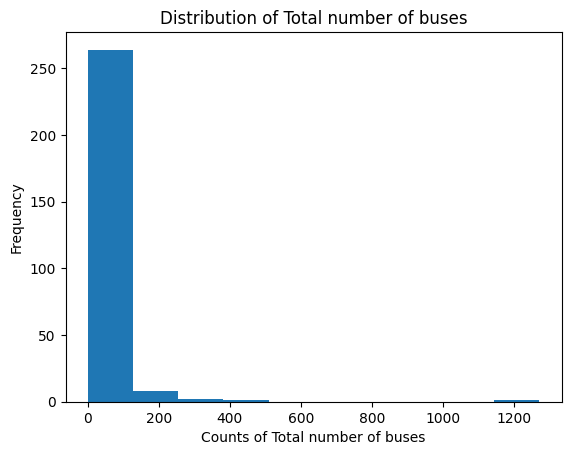

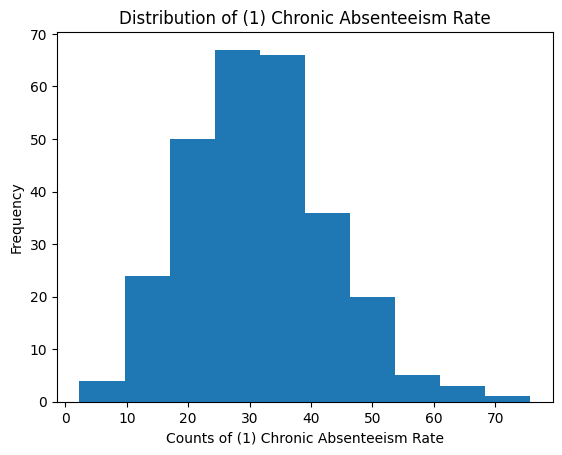

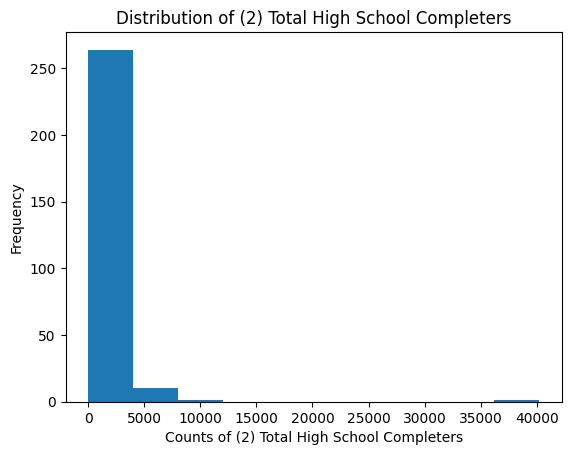

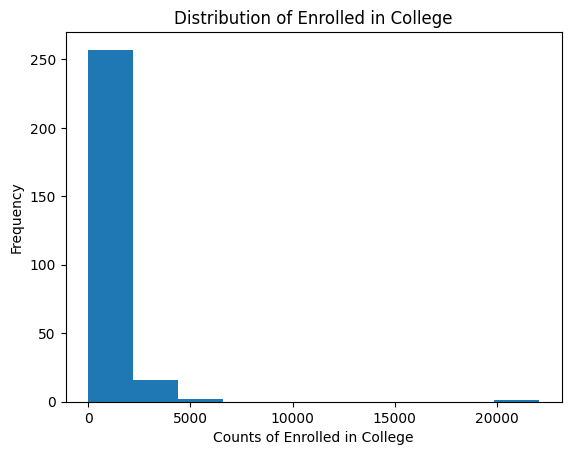

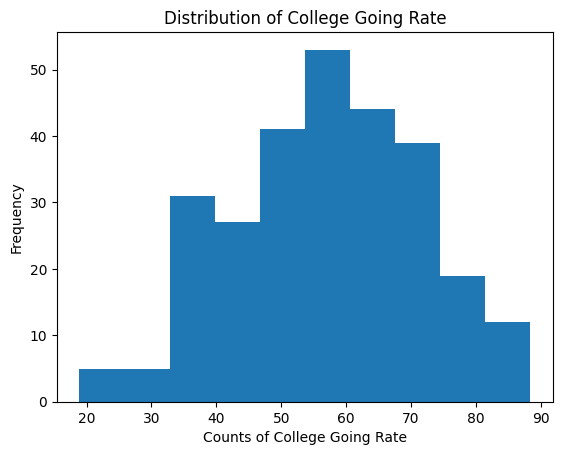

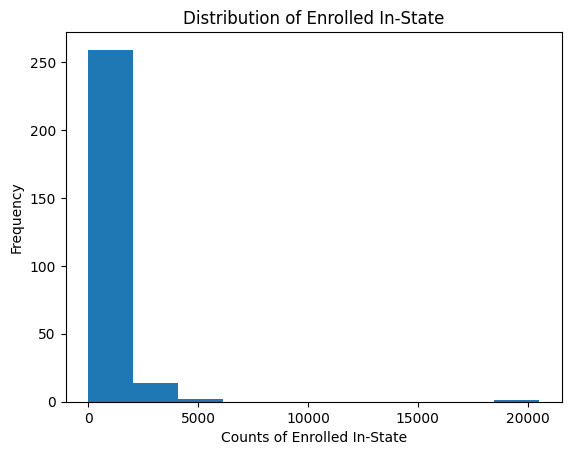

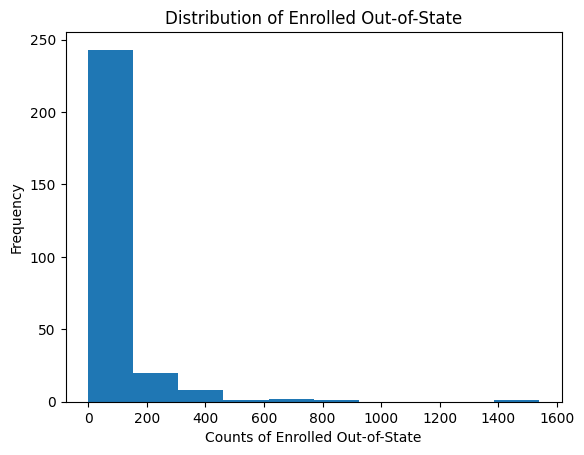

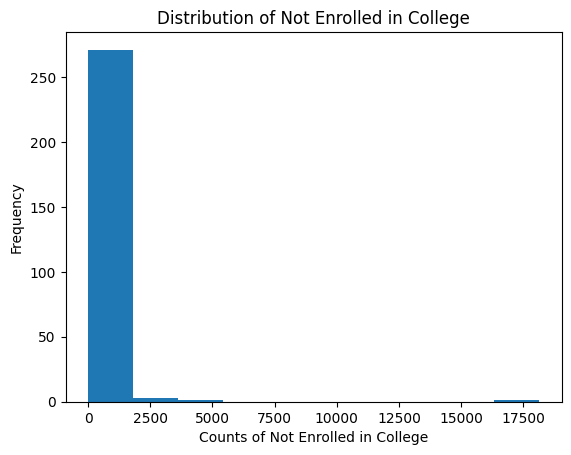

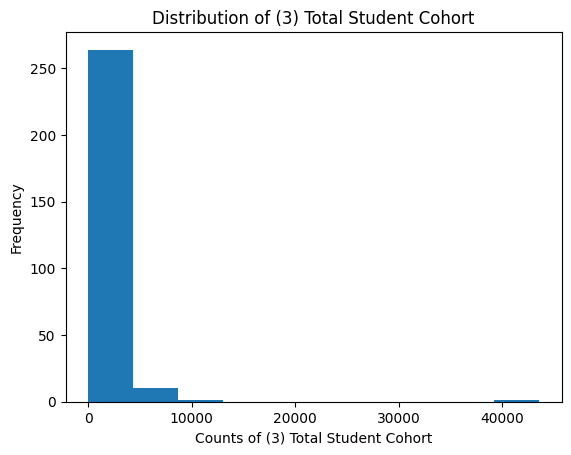

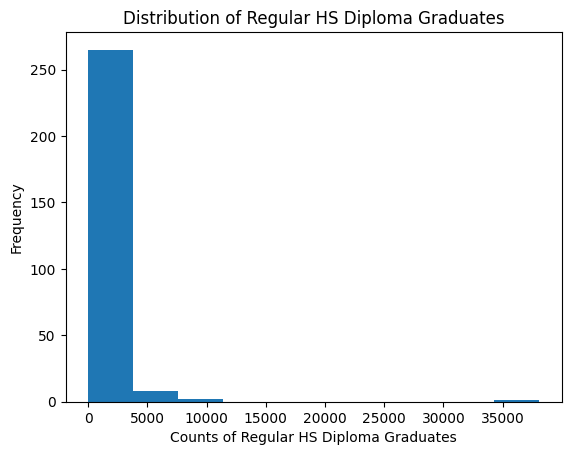

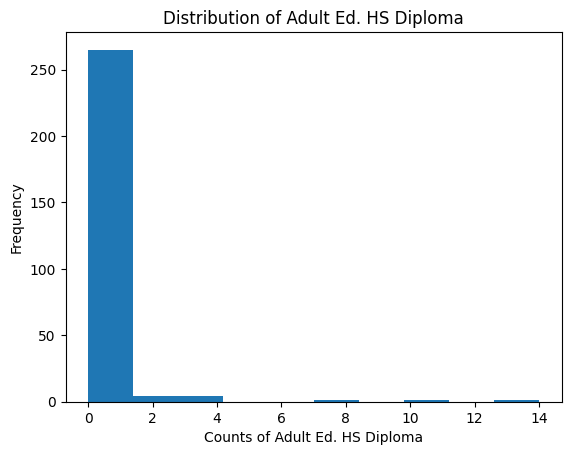

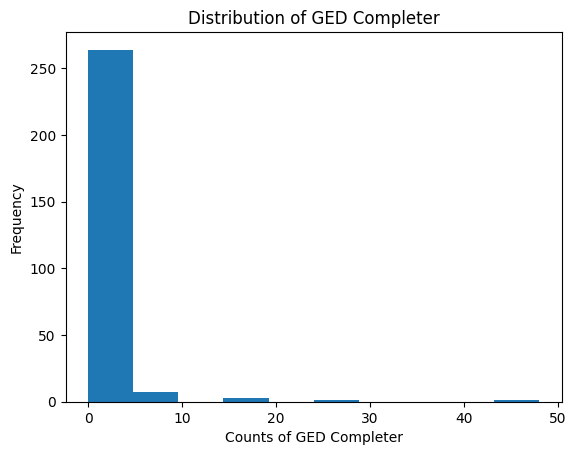

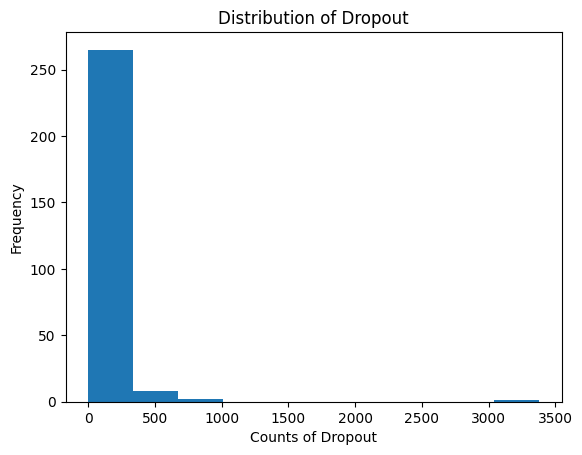

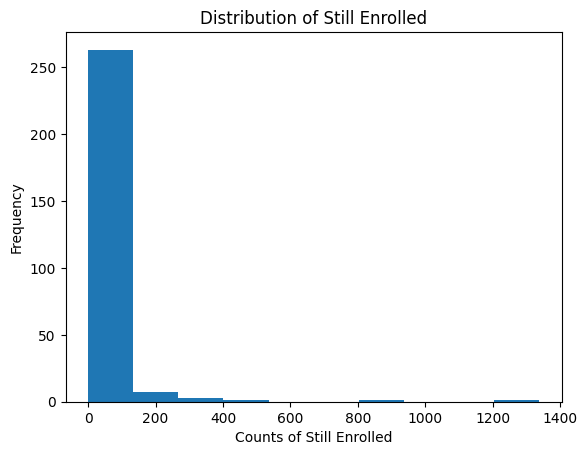

In [ ]:
# Create histograms for all of the (numeric) variables
for col in df_clean.select_dtypes(include=['number']).columns:
  plt.hist(df_clean[col])
  plt.title(f'Distribution of {col}')
  plt.xlabel(f'Counts of {col}')
  plt.ylabel('Frequency')
  plt.show()

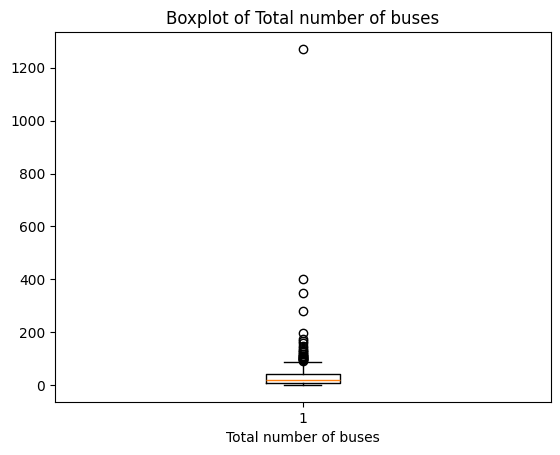

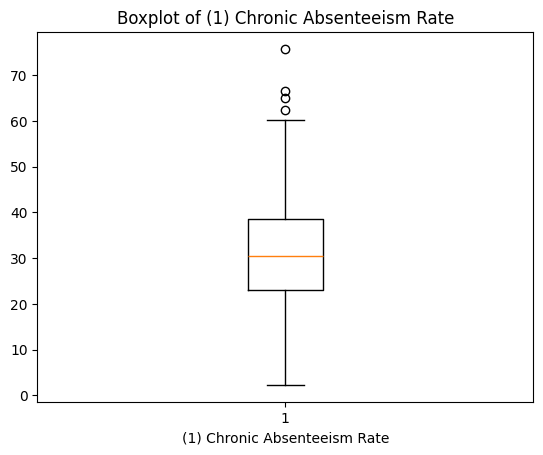

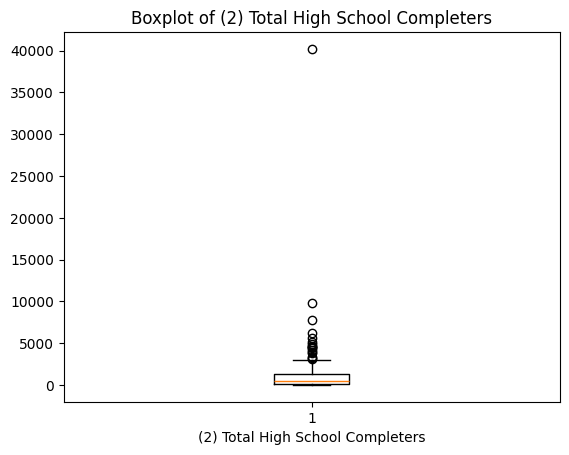

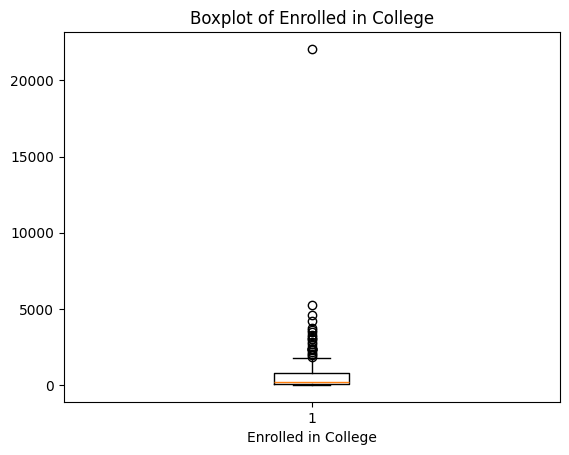

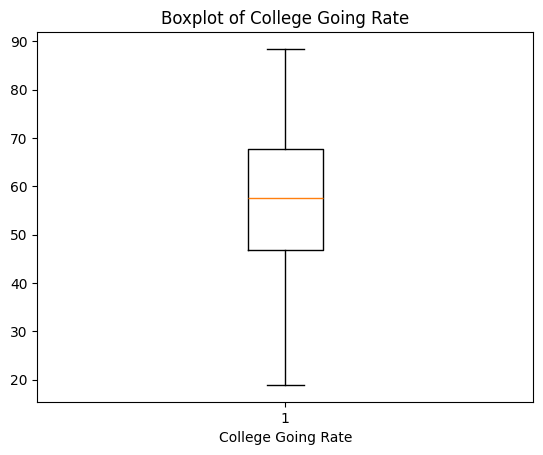

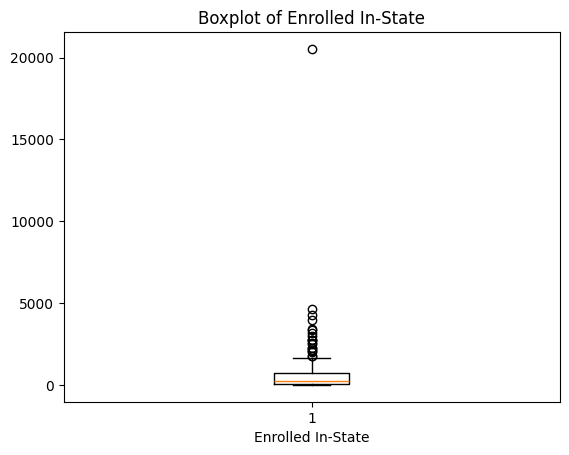

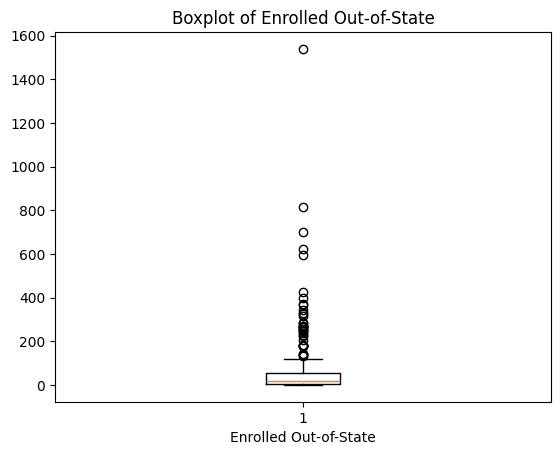

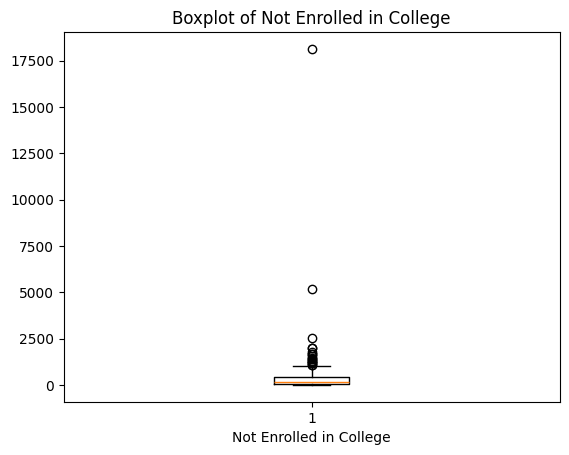

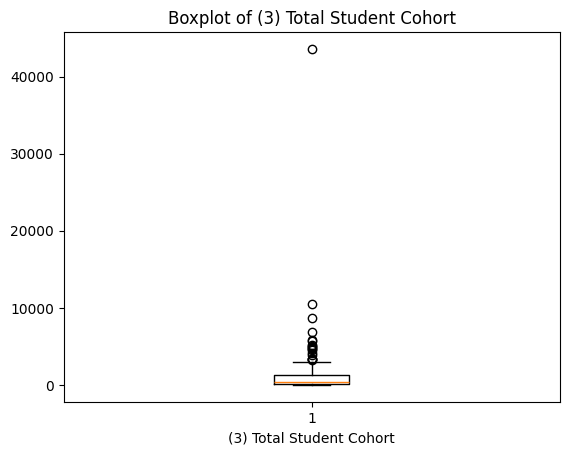

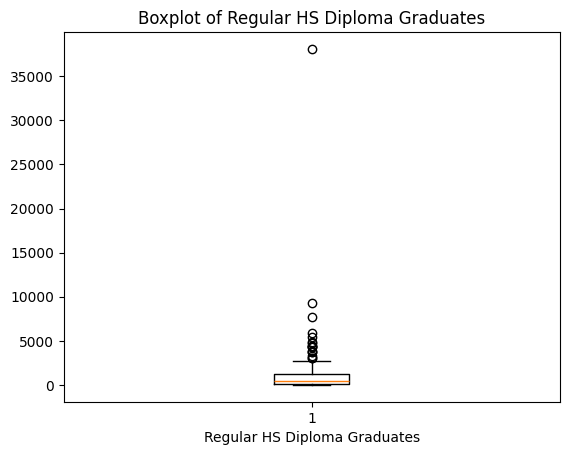

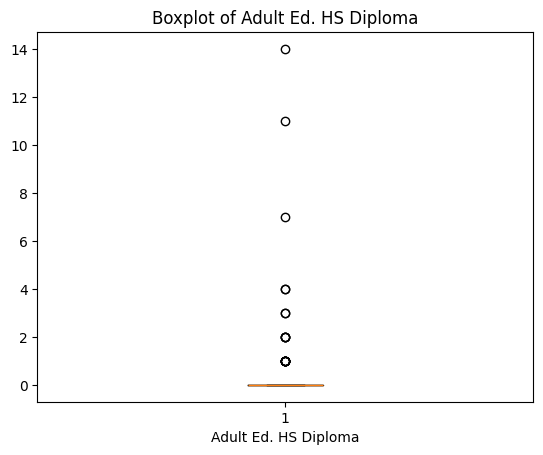

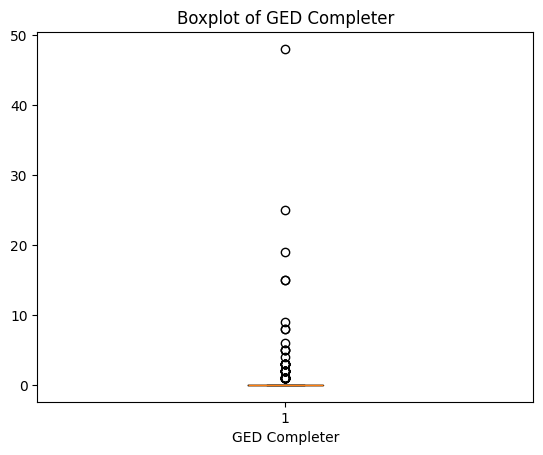

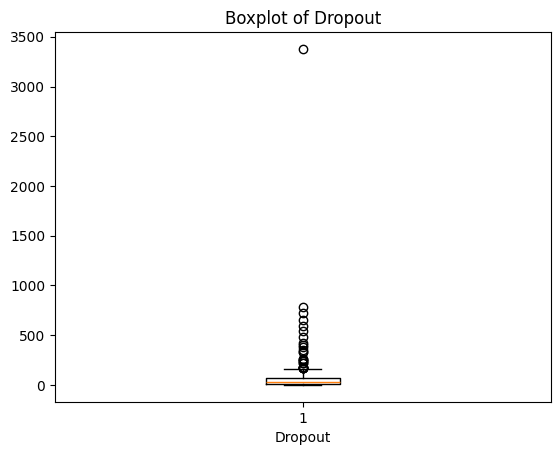

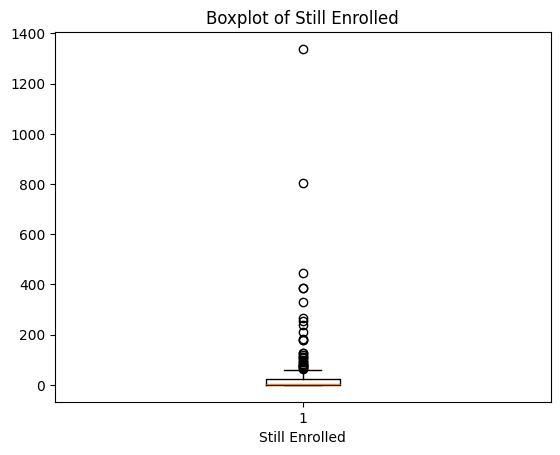

In [ ]:
# Create boxplots for all the (numeric) variables
for col in df_clean.select_dtypes(include=['number']).columns:
  plt.boxplot(df_clean[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(f'{col}')
  plt.show()

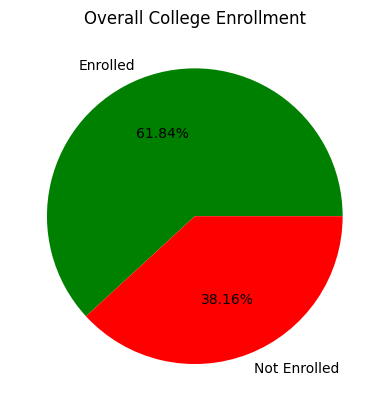

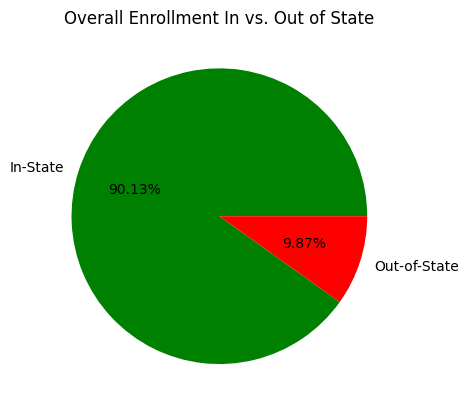

In [ ]:
# Create pie chart of 'Enrolled in College' vs 'Not Enrolled in College' for each district (produces 276 pie charts... way too many)
df_cgr = df_clean.filter(items = [
    'District Name',
    'Enrolled in College',
    'Not Enrolled in College'])
'''
# Plot pie charts for each school district
for idx, row in df_cgr.iterrows():
    plt.figure(figsize=(6, 6))
    values_to_plot = row[1:].values
    plt.pie(values_to_plot, autopct='%1.2f%%', labels=row[1:].index)
    plt.title(f"{row['District Name']}")
    plt.ylabel('')  # Hide the y-axis label
    plt.show()
'''
# Plot pie chart for overall 'Enrolled' vs 'Not Enrolled' (only one pie chart!)
df_cgr.drop(columns = ['District Name']).sum().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    title = 'Overall College Enrollment',
    labels = ['Enrolled', 'Not Enrolled'],
    colors = ['green', 'red'])
plt.show()

# Plot pie chart for overall ['Enrolled In-State'] vs ['Enrolled Out-of-State']
df_clean.filter(items = ['Enrolled In-State', 'Enrolled Out-of-State']).sum().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    title = 'Overall Enrollment In vs. Out of State',
    labels = ['In-State', 'Out-of-State'],
    colors = ['green', 'red'])
plt.show()

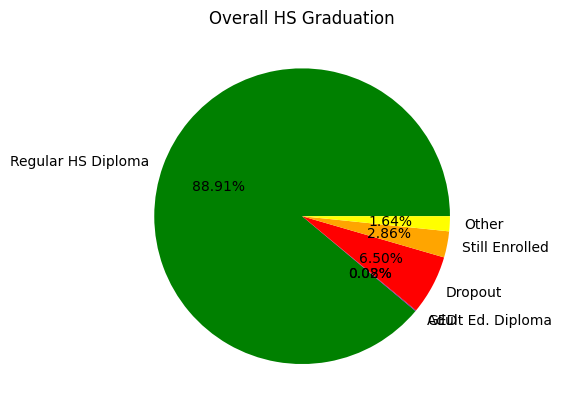

In [ ]:
# Create piechart from HS graduation rate data
df_hsgr = df_clean.filter(items = [
    'Total number of buses',
    '(3) Total Student Cohort',
    'Regular HS Diploma Graduates',
    'Adult Ed. HS Diploma',
    'GED Completer',
    'Dropout',
    'Still Enrolled'])

# Create column called ['Other'], since missing some data due to omitting variables during cleaning
df_hsgr['Other'] = df_hsgr['(3) Total Student Cohort'] - (df_hsgr['Regular HS Diploma Graduates'] + df_hsgr['Adult Ed. HS Diploma'] + df_hsgr['GED Completer'] + df_hsgr['Dropout'] + df_hsgr['Still Enrolled'])

# Plot pie chart for overall HS grad rates
df_hsgr.drop(columns = ['Total number of buses', '(3) Total Student Cohort']).sum().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    title = 'Overall HS Graduation',
    labels = ['Regular HS Diploma', 'Adult Ed. Diploma', 'GED', 'Dropout', 'Still Enrolled', 'Other'],
    colors = ['green', 'blue', 'purple', 'red', 'orange', 'yellow'])
plt.show()

## Bivariate EDA

In [ ]:
# Perform a correlation matrix on all of the numerical values
df_clean.select_dtypes(include=['number']).corr()

,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,Regular HS Diploma Graduates,Adult Ed. HS Diploma,GED Completer,Dropout,Still Enrolled
Total number of buses,1.000000,0.056479,0.925159,0.906318,0.091206,0.907692,0.749850,0.923058,0.925784,0.926138,0.163924,0.478403,0.870927,0.735539
(1) Chronic Absenteeism Rate,0.056479,1.000000,-0.016865,-0.059270,-0.372673,-0.045837,-0.184004,0.039131,-0.010924,-0.020937,-0.024561,-0.066225,0.072582,0.047715
(2) Total High School Completers,0.925159,-0.016865,1.000000,0.990447,0.138795,0.992637,0.812617,0.983575,0.999646,0.999512,0.098514,0.450181,0.943844,0.809213
Enrolled in College,0.906318,-0.059270,0.990447,1.000000,0.221002,0.998656,0.855957,0.949290,0.988800,0.991778,0.114930,0.480862,0.908668,0.778178
College Going Rate,0.091206,-0.372673,0.138795,0.221002,1.000000,0.204929,0.346699,0.027172,0.128629,0.148804,-0.034407,0.116525,-0.015075,-0.076572
Enrolled In-State,0.907692,-0.045837,0.992637,0.998656,0.204929,1.000000,0.828009,0.956042,0.991353,0.993688,0.109851,0.469890,0.916572,0.783386
Enrolled Out-of-State,0.749850,-0.184004,0.812617,0.855957,0.346699,0.828009,1.000000,0.732376,0.807608,0.816532,0.147600,0.514703,0.686665,0.603654
Not Enrolled in College,0.923058,0.039131,0.983575,0.949290,0.027172,0.956042,0.732376,1.000000,0.984924,0.980720,0.074176,0.396995,0.962584,0.826427
(3) Total Student Cohort,0.925784,-0.010924,0.999646,0.988800,0.128629,0.991353,0.807608,0.984924,1.000000,0.998882,0.102505,0.454149,0.949872,0.819637
Regular HS Diploma Graduates,0.926138,-0.020937,0.999512,0.991778,0.148804,0.993688,0.816532,0.980720,0.998882,1.000000,0.102141,0.452489,0.935594,0.794902


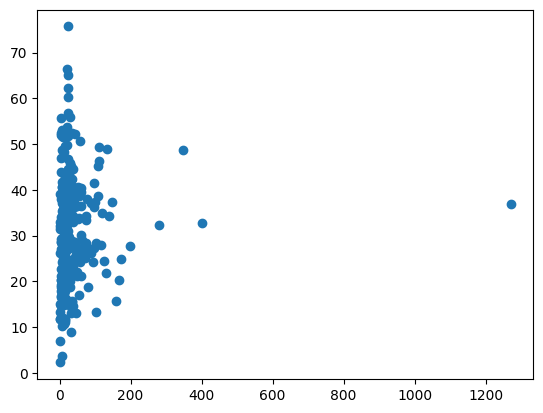

In [ ]:
# (1) Chronic Absenteeism Rate

# scatterplot of ['Total number of buses'] vs ['(1) Chronic Absenteeism Rate']
plt.scatter(
    df_clean['Total number of buses'],
    df_clean['(1) Chronic Absenteeism Rate'])
plt.xlabel = ['Buses Count']
plt.ylabel = ['Absenteeism Rate']
plt.title = ['Scatterplot of Bus Count vs Abseentism Rate']
plt.show()

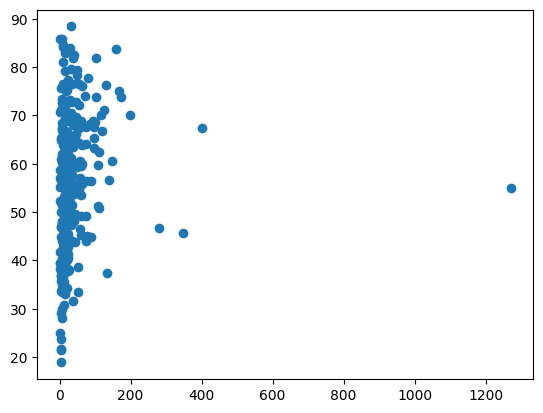

In [ ]:
# (2) College Going Rate

# scatterplot of ['Total number of buses'] vs ['College Going Rate']
plt.scatter(df_clean['Total number of buses'], df_clean['College Going Rate'])
plt.show()

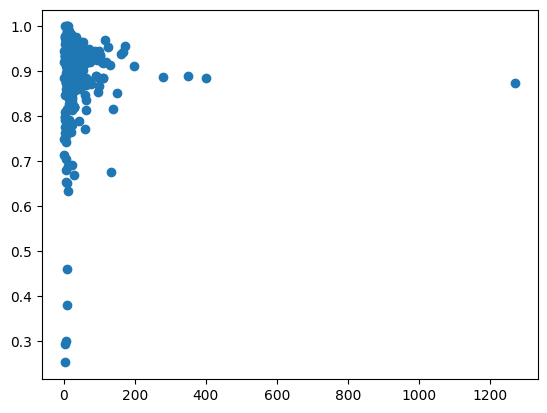

In [ ]:
# (3) HS Grad Rate

# First, add column to df_clean w/ the rate of Hs grad (as of rn, only have counts)
df_hsgr['HS Grad Rate'] = (df_hsgr['Regular HS Diploma Graduates'] + df_hsgr['Adult Ed. HS Diploma'] + df_hsgr['GED Completer']) / df_hsgr['(3) Total Student Cohort']

# scatterplot of ['Total number of buses'] to ['High School Completers']
plt.scatter(df_hsgr['Total number of buses'], df_hsgr['HS Grad Rate'])
plt.show()

# **Scaffold 3: Modeling Data & Drawing Inferential Conclusion**

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats

In [ ]:
# Result of Scaffold 2: final cleaned dataframe named df_clean (renaming it df here)
  # w/ 15 variables, 276 observations, correct python dtypes, and no NaN values
df = df_clean.copy() # .copy() creates a new, separate dataframe
print(df.columns.tolist())
df.head()

['District Name', 'Total number of buses', '(1) Chronic Absenteeism Rate', '(2) Total High School Completers', 'Enrolled in College', 'College Going Rate', 'Enrolled In-State', 'Enrolled Out-of-State', 'Not Enrolled in College', '(3) Total Student Cohort', 'Regular HS Diploma Graduates', 'Adult Ed. HS Diploma', 'GED Completer', 'Dropout', 'Still Enrolled']


,District Name,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,Regular HS Diploma Graduates,Adult Ed. HS Diploma,GED Completer,Dropout,Still Enrolled
0,Acton-Agua Dulce Unified,8,38.3,1814.0,511.0,28.2,464.0,47.0,1303.0,2434.0,923.0,0.0,3.0,654.0,806.0
1,Alhambra Unified,34,15.6,1623.0,1181.0,72.8,1144.0,37.0,442.0,1688.0,1610.0,2.0,0.0,18.0,26.0
2,Alpaugh Unified,4,28.7,86.0,29.0,33.7,26.0,3.0,57.0,96.0,76.0,0.0,0.0,17.0,1.0
3,Amador County Unified,38,34.4,303.0,146.0,48.2,121.0,25.0,157.0,318.0,300.0,0.0,1.0,12.0,4.0
4,Anaheim Union High,93,24.3,4567.0,3141.0,68.8,3000.0,141.0,1426.0,4825.0,4460.0,0.0,2.0,176.0,67.0


## OLS Regression for all Normalized Data (df)

In [ ]:
# Normalize bus availability and performance metrics
df['Buses per 1000 Students'] = (df['Total number of buses'] / df['(3) Total Student Cohort']) * 1000

df['(1) Absenteeism Rate'] = df['(1) Chronic Absenteeism Rate'] # just renamed it here, so columns stay in order

df['(2) College Going Rate'] = df['College Going Rate']
df['Enrolled In-State Rate'] = df['Enrolled In-State'] / df['(2) Total High School Completers']
df['Enrolled Out-of-State Rate'] = df['Enrolled Out-of-State'] / df['(2) Total High School Completers']
df['Not Enrolled Rate'] = df['Not Enrolled in College'] / df['(2) Total High School Completers']

df['(3) HS Grad Rate'] = df['Regular HS Diploma Graduates'] / df['(3) Total Student Cohort']
df['Adult Ed. Diploma Rate'] = df['Adult Ed. HS Diploma'] / df['(3) Total Student Cohort']
df['GED Rate'] = df['GED Completer'] / df['(3) Total Student Cohort']
df['Dropout Rate'] = df['Dropout'] / df['(3) Total Student Cohort']
df['Still Enrolled Rate'] = df['Still Enrolled'] / df['(3) Total Student Cohort']

In [ ]:
# Print the columns and head of the dataframe (contains original & normalized data)
print(df.columns.tolist())
df.head()

['District Name', 'Total number of buses', '(1) Chronic Absenteeism Rate', '(2) Total High School Completers', 'Enrolled in College', 'College Going Rate', 'Enrolled In-State', 'Enrolled Out-of-State', 'Not Enrolled in College', '(3) Total Student Cohort', 'Regular HS Diploma Graduates', 'Adult Ed. HS Diploma', 'GED Completer', 'Dropout', 'Still Enrolled', 'Buses per 1000 Students', '(1) Absenteeism Rate', '(2) College Going Rate', 'Enrolled In-State Rate', 'Enrolled Out-of-State Rate', 'Not Enrolled Rate', '(3) HS Grad Rate', 'Adult Ed. Diploma Rate', 'GED Rate', 'Dropout Rate', 'Still Enrolled Rate']


,District Name,Total number of buses,(1) Chronic Absenteeism Rate,(2) Total High School Completers,Enrolled in College,College Going Rate,Enrolled In-State,Enrolled Out-of-State,Not Enrolled in College,(3) Total Student Cohort,...,(1) Absenteeism Rate,(2) College Going Rate,Enrolled In-State Rate,Enrolled Out-of-State Rate,Not Enrolled Rate,(3) HS Grad Rate,Adult Ed. Diploma Rate,GED Rate,Dropout Rate,Still Enrolled Rate
0,Acton-Agua Dulce Unified,8,38.3,1814.0,511.0,28.2,464.0,47.0,1303.0,2434.0,...,38.3,28.2,0.255788,0.025910,0.718302,0.379211,0.000000,0.001233,0.268694,0.331142
1,Alhambra Unified,34,15.6,1623.0,1181.0,72.8,1144.0,37.0,442.0,1688.0,...,15.6,72.8,0.704868,0.022797,0.272335,0.953791,0.001185,0.000000,0.010664,0.015403
2,Alpaugh Unified,4,28.7,86.0,29.0,33.7,26.0,3.0,57.0,96.0,...,28.7,33.7,0.302326,0.034884,0.662791,0.791667,0.000000,0.000000,0.177083,0.010417
3,Amador County Unified,38,34.4,303.0,146.0,48.2,121.0,25.0,157.0,318.0,...,34.4,48.2,0.399340,0.082508,0.518152,0.943396,0.000000,0.003145,0.037736,0.012579
4,Anaheim Union High,93,24.3,4567.0,3141.0,68.8,3000.0,141.0,1426.0,4825.0,...,24.3,68.8,0.656886,0.030874,0.312240,0.924352,0.000000,0.000415,0.036477,0.013886


In [ ]:
# List just the normalized columns
normalized_columns = [
    'District Name',

    'Buses per 1000 Students',

    '(1) Absenteeism Rate',

    '(2) College Going Rate',
    'Enrolled In-State Rate',
    'Enrolled Out-of-State Rate',
    'Not Enrolled Rate',

    '(3) HS Grad Rate',
    'Adult Ed. Diploma Rate',
    'GED Rate',
    'Dropout Rate',
    'Still Enrolled Rate']

# Create new dataframe with just these columns
df_normalized = df[normalized_columns]
df_normalized.head()

,District Name,Buses per 1000 Students,(1) Absenteeism Rate,(2) College Going Rate,Enrolled In-State Rate,Enrolled Out-of-State Rate,Not Enrolled Rate,(3) HS Grad Rate,Adult Ed. Diploma Rate,GED Rate,Dropout Rate,Still Enrolled Rate
0,Acton-Agua Dulce Unified,3.286771,38.3,28.2,0.255788,0.025910,0.718302,0.379211,0.000000,0.001233,0.268694,0.331142
1,Alhambra Unified,20.142180,15.6,72.8,0.704868,0.022797,0.272335,0.953791,0.001185,0.000000,0.010664,0.015403
2,Alpaugh Unified,41.666667,28.7,33.7,0.302326,0.034884,0.662791,0.791667,0.000000,0.000000,0.177083,0.010417
3,Amador County Unified,119.496855,34.4,48.2,0.399340,0.082508,0.518152,0.943396,0.000000,0.003145,0.037736,0.012579
4,Anaheim Union High,19.274611,24.3,68.8,0.656886,0.030874,0.312240,0.924352,0.000000,0.000415,0.036477,0.013886


In [ ]:
# Select columns of interest for dataframe and success metrics
analysis_columns = [
    'District Name',

    'Buses per 1000 Students',

    '(1) Absenteeism Rate',

    '(2) College Going Rate',
    'Enrolled In-State Rate',
    'Enrolled Out-of-State Rate',
    'Not Enrolled Rate',

    '(3) HS Grad Rate',
    'Adult Ed. Diploma Rate',
    'GED Rate',
    'Dropout Rate',
    'Still Enrolled Rate']

success_metrics = [
    '(1) Absenteeism Rate',

    '(2) College Going Rate',
    'Enrolled In-State Rate',
    'Enrolled Out-of-State Rate',
    'Not Enrolled Rate',

    '(3) HS Grad Rate',
    'Adult Ed. Diploma Rate',
    'GED Rate',
    'Dropout Rate',
    'Still Enrolled Rate']

# Create the new dataframe containing just the variables of interest
df_analysis = df_normalized[analysis_columns]
df_analysis.head()

,District Name,Buses per 1000 Students,(1) Absenteeism Rate,(2) College Going Rate,Enrolled In-State Rate,Enrolled Out-of-State Rate,Not Enrolled Rate,(3) HS Grad Rate,Adult Ed. Diploma Rate,GED Rate,Dropout Rate,Still Enrolled Rate
0,Acton-Agua Dulce Unified,3.286771,38.3,28.2,0.255788,0.025910,0.718302,0.379211,0.000000,0.001233,0.268694,0.331142
1,Alhambra Unified,20.142180,15.6,72.8,0.704868,0.022797,0.272335,0.953791,0.001185,0.000000,0.010664,0.015403
2,Alpaugh Unified,41.666667,28.7,33.7,0.302326,0.034884,0.662791,0.791667,0.000000,0.000000,0.177083,0.010417
3,Amador County Unified,119.496855,34.4,48.2,0.399340,0.082508,0.518152,0.943396,0.000000,0.003145,0.037736,0.012579
4,Anaheim Union High,19.274611,24.3,68.8,0.656886,0.030874,0.312240,0.924352,0.000000,0.000415,0.036477,0.013886


In [ ]:
# Download csv file of df_analysis for upload into Tableau
df_analysis.to_csv('df_analysis.csv', index=False)
from google.colab import files
# files.download('df_analysis.csv')

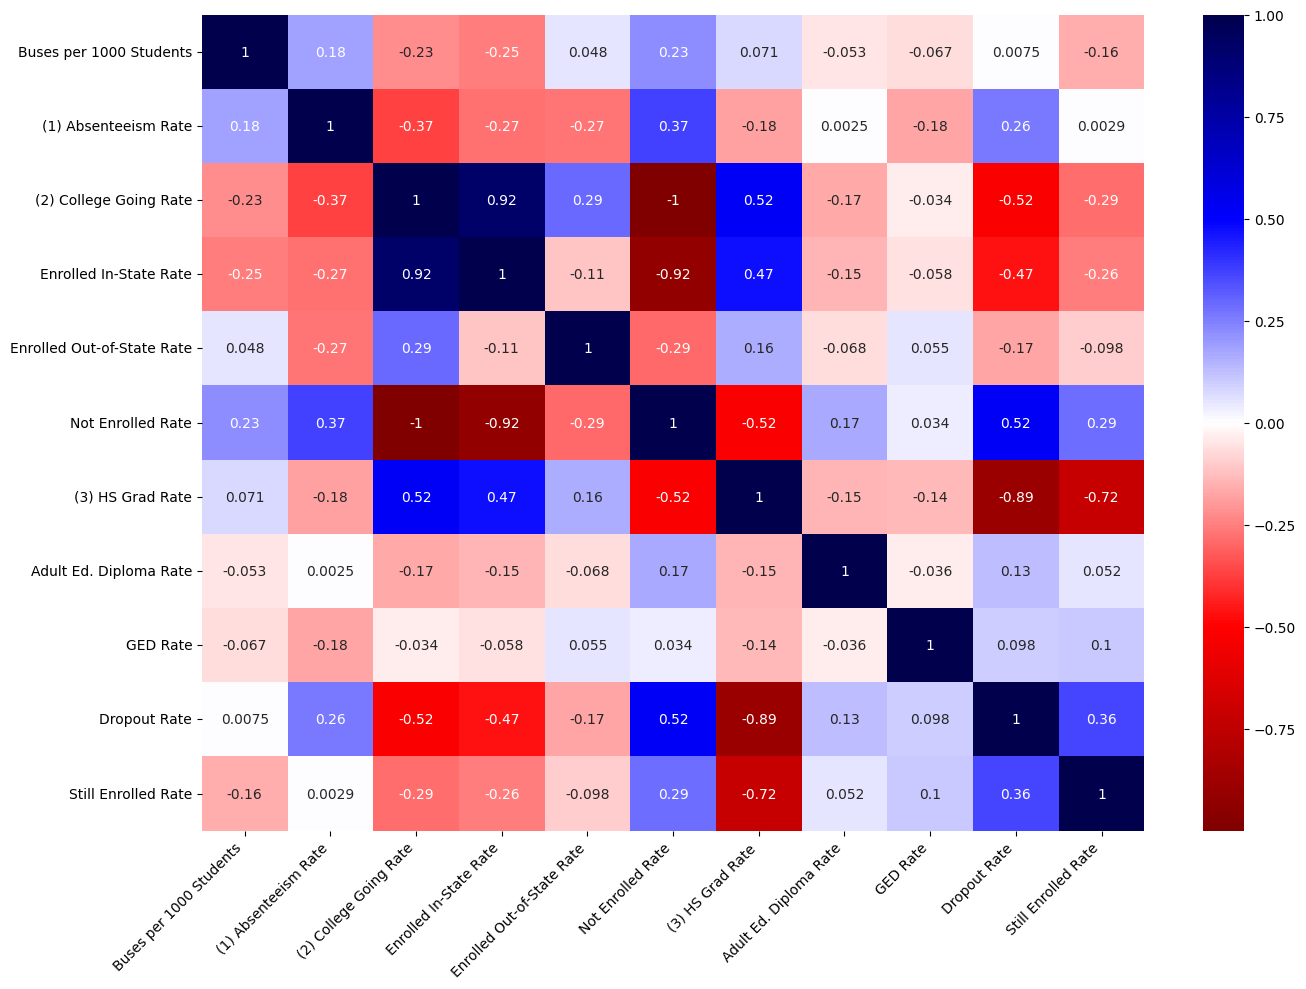

In [ ]:
# Generate the correlation matrix
correlations = df_analysis[['Buses per 1000 Students'] + list(success_metrics)].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='seismic_r', center = 0)
# plt.title("Correlation Heatmap - Bus Availability vs Student Success Metrics")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Test assumptions for each variable
for metric in success_metrics:
  print(f"\n Assumption Check: {metric} ~ Buses per 1000 Students")
  y = df_analysis[metric]
  X = df_analysis['Buses per 1000 Students']
  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()

  # Test for Linearity
  t_stat, p_val = sms.diagnostic.linear_harvey_collier(model)
  print(f"Harvey Collier Linearity Test: p-val={p_val:.3f}")

  # Test for Independence
  t_stat = sms.stattools.durbin_watson(model.resid)
  print(f"Durbin Watson Independence Test: t-stat={t_stat:.3f}")

  # Test for Normality
  t_stat, p_val = sms.diagnostic.normal_ad(model.resid)
  print(f"Anderson Darling Normality Test: t={t_stat:.3f}, p={p_val:.3f}")

  # Test for Equal (residual) variance
  breuschpagan_test = smd.het_breuschpagan(model.resid, model.model.exog)
  print(f"Breusch-Pagan Residual Variance Test: p={breuschpagan_test[1]:.3f}")


 Assumption Check: (1) Absenteeism Rate ~ Buses per 1000 Students
Harvey Collier Linearity Test: p-val=0.546
Durbin Watson Independence Test: t-stat=2.004
Anderson Darling Normality Test: t=0.587, p=0.125
Breusch-Pagan Residual Variance Test: p=0.102

 Assumption Check: (2) College Going Rate ~ Buses per 1000 Students
Harvey Collier Linearity Test: p-val=0.656
Durbin Watson Independence Test: t-stat=1.894
Anderson Darling Normality Test: t=0.230, p=0.805
Breusch-Pagan Residual Variance Test: p=0.167

 Assumption Check: Enrolled In-State Rate ~ Buses per 1000 Students
Harvey Collier Linearity Test: p-val=0.923
Durbin Watson Independence Test: t-stat=2.030
Anderson Darling Normality Test: t=1.113, p=0.006
Breusch-Pagan Residual Variance Test: p=0.001

 Assumption Check: Enrolled Out-of-State Rate ~ Buses per 1000 Students
Harvey Collier Linearity Test: p-val=0.194
Durbin Watson Independence Test: t-stat=1.838
Anderson Darling Normality Test: t=13.153, p=0.000
Breusch-Pagan Residual Vari

In [ ]:
# Perform OLS for each variable with respect to buses
for metric in success_metrics:
    print(f"\n Regression: {metric} ~ Buses per 1000 Students")
    y = df_analysis[metric]
    X = df_analysis['Buses per 1000 Students']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())


 Regression: (1) Absenteeism Rate ~ Buses per 1000 Students
                             OLS Regression Results                             
Dep. Variable:     (1) Absenteeism Rate   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.030
Method:                   Least Squares   F-statistic:                     9.380
Date:                  Thu, 01 May 2025   Prob (F-statistic):            0.00241
Time:                          19:30:54   Log-Likelihood:                -1068.0
No. Observations:                   276   AIC:                             2140.
Df Residuals:                       274   BIC:                             2147.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

## OLS Regressions for (1) Absenteeism Rate vs Bus Count

In [ ]:
df_analysis.head()

,District Name,Buses per 1000 Students,(1) Absenteeism Rate,(2) College Going Rate,Enrolled In-State Rate,Enrolled Out-of-State Rate,Not Enrolled Rate,(3) HS Grad Rate,Adult Ed. Diploma Rate,GED Rate,Dropout Rate,Still Enrolled Rate
0,Acton-Agua Dulce Unified,3.286771,38.3,28.2,0.255788,0.025910,0.718302,0.379211,0.000000,0.001233,0.268694,0.331142
1,Alhambra Unified,20.142180,15.6,72.8,0.704868,0.022797,0.272335,0.953791,0.001185,0.000000,0.010664,0.015403
2,Alpaugh Unified,41.666667,28.7,33.7,0.302326,0.034884,0.662791,0.791667,0.000000,0.000000,0.177083,0.010417
3,Amador County Unified,119.496855,34.4,48.2,0.399340,0.082508,0.518152,0.943396,0.000000,0.003145,0.037736,0.012579
4,Anaheim Union High,19.274611,24.3,68.8,0.656886,0.030874,0.312240,0.924352,0.000000,0.000415,0.036477,0.013886


In [ ]:
# Define the model
y = df_analysis['(1) Absenteeism Rate']
x = df_analysis['Buses per 1000 Students']
x = sm.add_constant(x)
car_mod = sm.OLS(y, x)

# Fit the model
car_mod = car_mod.fit()

# Return summary of the model
dir(car_mod) # returns directory
print(car_mod.summary())

                             OLS Regression Results                             
Dep. Variable:     (1) Absenteeism Rate   R-squared:                       0.033
Model:                              OLS   Adj. R-squared:                  0.030
Method:                   Least Squares   F-statistic:                     9.380
Date:                  Thu, 01 May 2025   Prob (F-statistic):            0.00241
Time:                          19:30:54   Log-Likelihood:                -1068.0
No. Observations:                   276   AIC:                             2140.
Df Residuals:                       274   BIC:                             2147.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

LINE Assumptions:

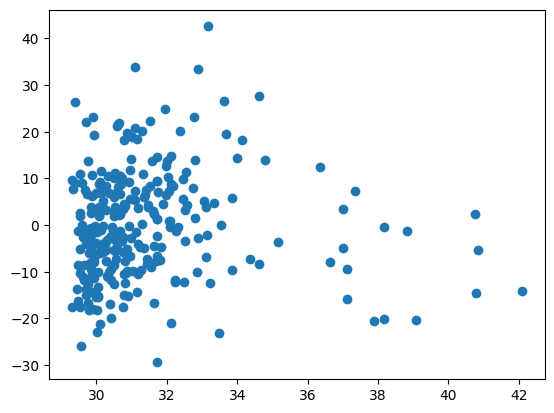

The p-value is 0.5462391546830645 >>> 0.05, so the linearity test passes.


In [ ]:
# Linearity Test

# Plot the residuals vs fittedvalues
plt.scatter(car_mod.fittedvalues, car_mod.resid)
plt.show()

# Harvey Collier test
t_stat, p_val = sms.diagnostic.linear_harvey_collier(car_mod)
print('The p-value is', p_val, '>>> 0.05, so the linearity test passes.')

In [ ]:
# Independence Test

# Durbin Watson test
t_stat = sms.stattools.durbin_watson(car_mod.resid)
print('The t-stat is', t_stat, 'so the linearity test passes.')

The t-stat is 2.0036595963075374 so the linearity test passes.


In [ ]:
# Normality Test

# Anderson Darling test
t_stat, p_val = sms.diagnostic.normal_ad(car_mod.resid)
print('The p_val is', p_val, '> 0.05, so the normality test passes.')

The p_val is 0.1251609509295626 > 0.05, so the normality test passes.


In [ ]:
# Equal Variance Test

# Breuschpagan test
t_stat, p_val, f_stat, f_pval = sms.diagnostic.het_breuschpagan(car_mod.resid, car_mod.model.exog)
print('The p-value is', f_pval, '> 0.05, so the equal variance test passes.')

The p-value is 0.10289375423664525 > 0.05, so the equal variance test passes.


## OLS Regression for (2) College Going Rate vs Bus Count

In [ ]:
# Define the model
y = df['(2) College Going Rate']
x = df['Buses per 1000 Students']
x = sm.add_constant(x)
cgr_mod = sm.OLS(y, x)

# Fit the model
cgr_mod = cgr_mod.fit()

# Return summary of the model
dir(cgr_mod) # returns directory
print(cgr_mod.summary())

                              OLS Regression Results                              
Dep. Variable:     (2) College Going Rate   R-squared:                       0.051
Model:                                OLS   Adj. R-squared:                  0.047
Method:                     Least Squares   F-statistic:                     14.63
Date:                    Thu, 01 May 2025   Prob (F-statistic):           0.000162
Time:                            19:30:54   Log-Likelihood:                -1118.3
No. Observations:                     276   AIC:                             2241.
Df Residuals:                         274   BIC:                             2248.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

LINE Assumptions:

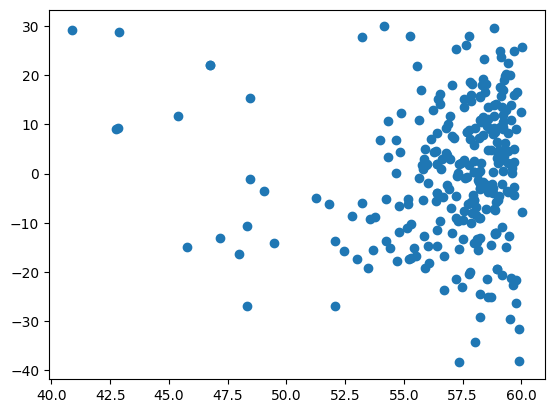

The p-value is 0.6560665017402989 >>> 0.05, so the linearity test passes.


In [ ]:
# Linearity Test

# Plot the residuals vs fittedvalues
plt.scatter(cgr_mod.fittedvalues, cgr_mod.resid)
plt.show()

# Harvey Collier test
t_stat, p_val = sms.diagnostic.linear_harvey_collier(cgr_mod)
print('The p-value is', p_val, '>>> 0.05, so the linearity test passes.')

In [ ]:
# Independence Test

# Durbin Watson test
t_stat = sms.stattools.durbin_watson(cgr_mod.resid)
print('The t-stat is', t_stat, 'so the independence test passes.')

The t-stat is 1.893601064716356 so the independence test passes.


In [ ]:
# Normality Test

# Anderson Darling test
t_stat, p_val = sms.diagnostic.normal_ad(cgr_mod.resid)
print('The p_val is', p_val, '>>> 0.05, so the normality test passes.')

The p_val is 0.8053315535622387 >>> 0.05, so the normality test passes.


In [ ]:
# Equal Variance Test

# Breuschpagan test
t_stat, p_val, f_stat, f_pval = sms.diagnostic.het_breuschpagan(cgr_mod.resid, cgr_mod.model.exog)
print('The p-value is', f_pval, '> 0.05, so the equal variance test passes.')

The p-value is 0.16845735507358206 > 0.05, so the equal variance test passes.


## OLS Regression for (3) HS Grad Rate vs Bus Count

In [ ]:
# Define the model
y = df['(3) HS Grad Rate']
x = df['Buses per 1000 Students']
x = sm.add_constant(x)
hsgr_mod = sm.OLS(y, x)

# Fit the model
hsgr_mod = hsgr_mod.fit()

# Return summary of the model
dir(hsgr_mod) # returns directory
print(hsgr_mod.summary())

                            OLS Regression Results                            
Dep. Variable:       (3) HS Grad Rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.398
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.238
Time:                        19:30:55   Log-Likelihood:                 236.65
No. Observations:                 276   AIC:                            -469.3
Df Residuals:                     274   BIC:                            -462.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

LINE Assumptions:

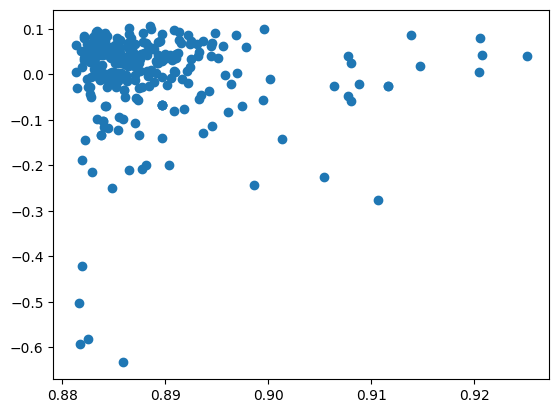

The p-value is 0.5927928597290244 >>> 0.05, so the linearity test passes.


In [ ]:
# Linearity Test

# Plot the residuals vs fittedvalues
plt.scatter(hsgr_mod.fittedvalues, hsgr_mod.resid)
plt.show()

# Harvey Collier test
t_stat, p_val = sms.diagnostic.linear_harvey_collier(hsgr_mod)
print('The p-value is', p_val, '>>> 0.05, so the linearity test passes.')

In [ ]:
# Independence Test

# Durbin Watson test
t_stat = sms.stattools.durbin_watson(hsgr_mod.resid)
print('The t-stat is', t_stat, 'so the independence test passes.')

The t-stat is 1.9429171034119364 so the independence test passes.


The p_val is 0.0 < 0.05... *this does NOT pass the normality test


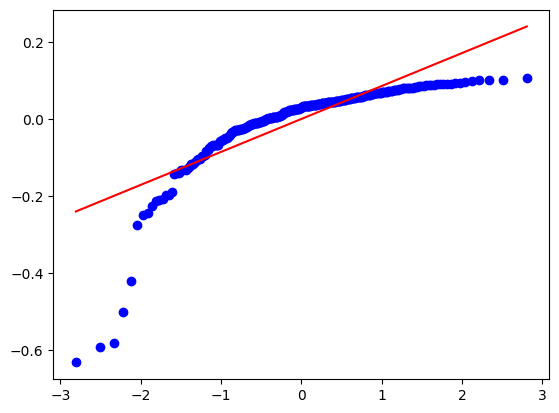

The p_val is 0.06325017039936469 > 0.05... this passes now!


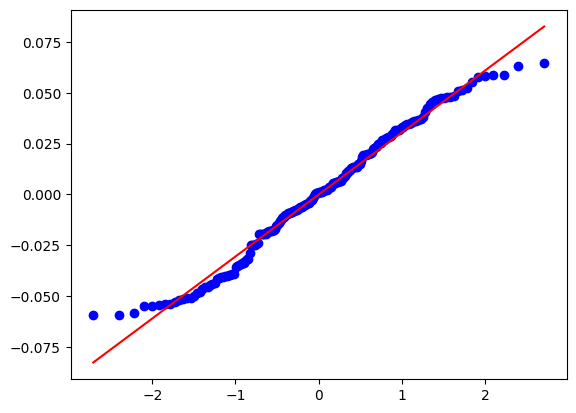

In [ ]:
# Normality Test

# Anderson Darling test
t_stat, p_val = sms.diagnostic.normal_ad(hsgr_mod.resid)
print('The p_val is', p_val, '< 0.05... *this does NOT pass the normality test')

# QQ plot --> shows non-normality!
stats.probplot(hsgr_mod.resid, dist='norm', plot=plt)
plt.show()

# Narrowing down model to exclude outliers:
df2 = df[(df['(3) HS Grad Rate'] >= 0.873)]
y = df2['(3) HS Grad Rate']
x = df2['Buses per 1000 Students']
x = sm.add_constant(x)
hsgr2_mod = sm.OLS(y, x)

# Fit the new model
hsgr2_mod = hsgr2_mod.fit()

# Anderson Darling test on modified data (df2)
t_stat, p_val = sms.diagnostic.normal_ad(hsgr2_mod.resid)
print('The p_val is', p_val, '> 0.05... this passes now!')

# QQ plot --> shows normality now
stats.probplot(hsgr2_mod.resid, dist='norm', plot=plt)
plt.show()

In [ ]:
# Equal Variance Test

# Breuschpagan test
t_stat, p_val, f_stat, f_pval = sms.diagnostic.het_breuschpagan(hsgr_mod.resid, hsgr_mod.model.exog)
print('The p-value is', f_pval, '>> 0.05, so the equal variance test passes.')

The p-value is 0.23630705727834153 >> 0.05, so the equal variance test passes.


# **Scaffold 4: Data Visualization**

Process:
* Create a data visualization of the model results (using Tableau)
* Tableau link: https://public.tableau.com/views/DATA0200Scaffold4-DataVisualization/DATA0200Scaffold4?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Association between Absenteeism Rate vs Buses per 1000 Students:


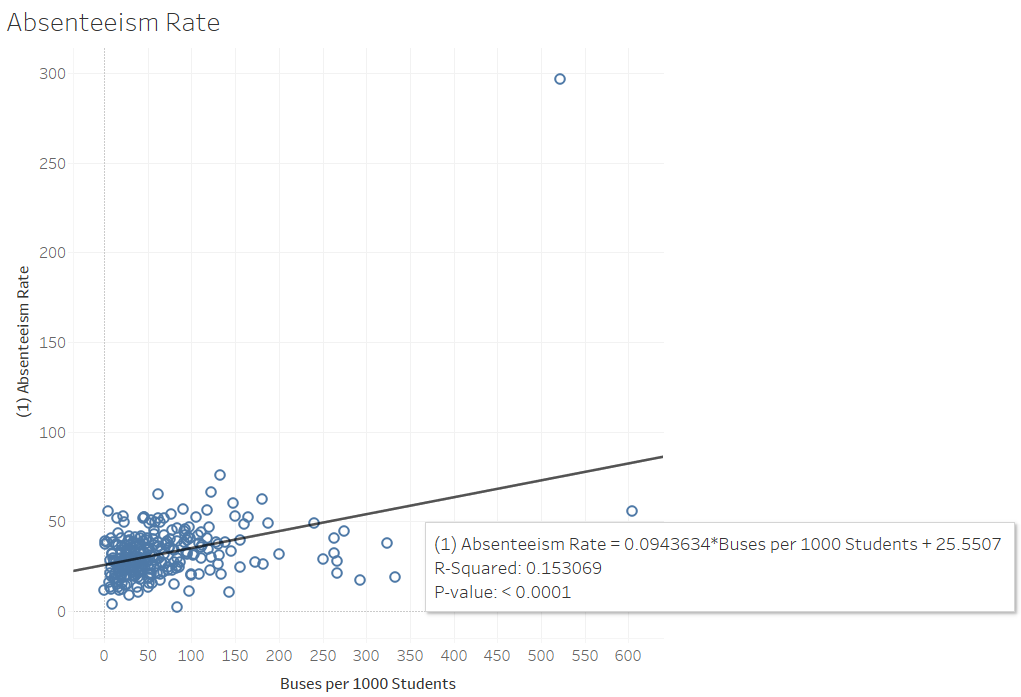

## Association between College-Going Rate vs Buses per 1000 Students

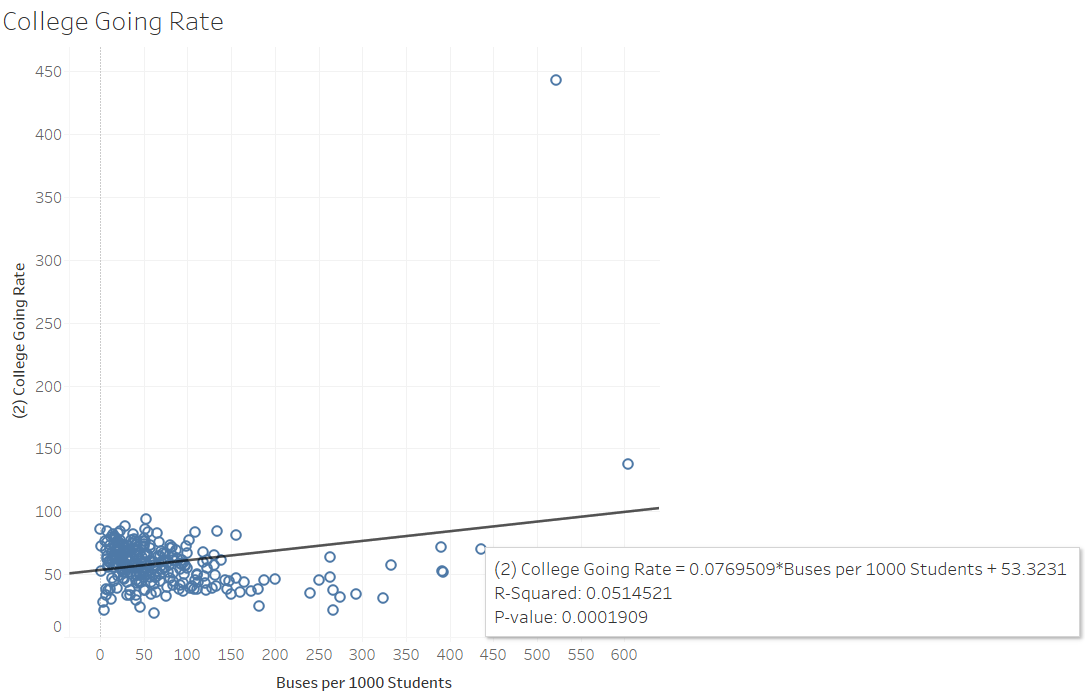

## Association between HS Graduation Rate vs Buses per 1000 Students

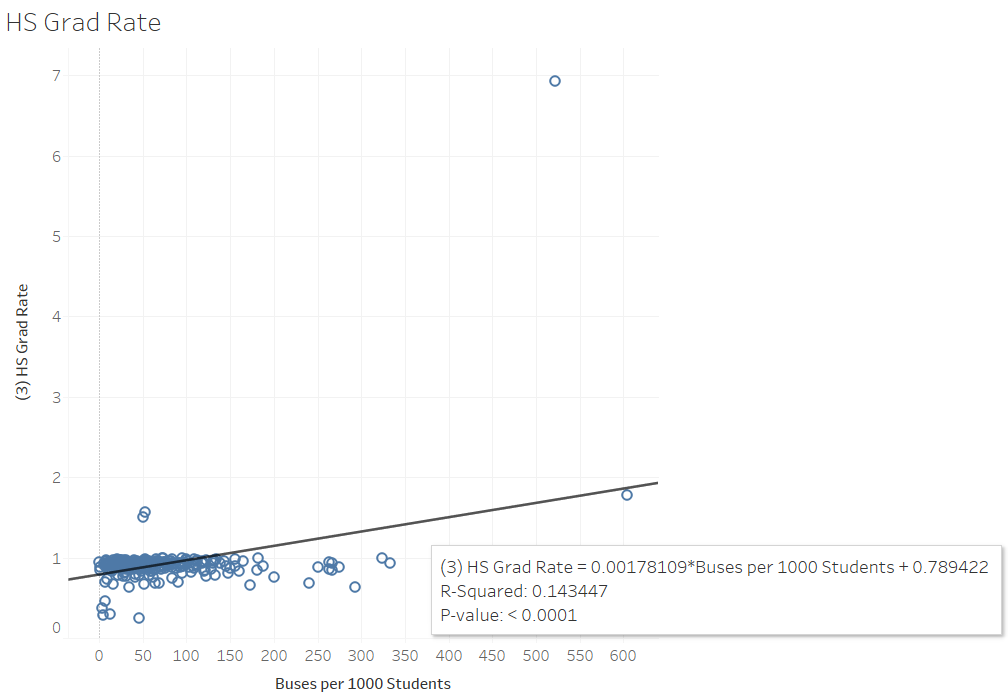